# <div style="padding:20px;color:white;margin:0;font-size:40px;font-family: helvetica;text-align:left;display:fill; border-radius:5px;background-color:#2e8b57;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Phân tích từ khóa
import warnings
warnings.filterwarnings("ignore")


Đọc dữ liệu

In [3]:
file_path = "./data/delivery_info_clean.csv"
df = pd.read_csv(file_path)
df.drop(columns=['url', 'id'], inplace=True) # remove column url
df.head()

total_review  avg  restaurant_id                                   name  \
0             4  0.0         176862           Út Nhỏ - Bông Lan Trứng Muối   
1          1000  4.7           4058          Bánh Canh Cua - Huỳnh Mẫn Đạt   
2           100  4.6          16724         Cơm Gà & Hoành Thánh Lá Bà Hạt   
3          1000  4.7         172177               Mệ Vui 29 Trần Quốc Toản   
4           100  4.9          85648  Bánh Flan Quả Trứng - Bán Hàng Online   

    categories                   cuisines  is_quality_merchant   latitude  \
0    Tiệm bánh                   Món Việt                False  10.783244   
1      Quán ăn                   Món Việt                 True  10.754674   
2      Quán ăn                   Món Việt                False  10.766374   
3      Quán ăn  Món Miền Trung, Món Quảng                False  10.789089   
4  Shop Online                   Món Việt                False  10.792396   

    longitude  brand_id           brand_name  district  avg_price  
0  106.658182         0              Unknown  Tân Bình         54  
1  106.676774         0              Unknown    Quận 5         50  
2  106.670165         0              Unknown   Quận 10         45  
3  106.689234      1520               Mệ Vui    Quận 3         41  
4  106.648690      4943  Bánh Flan Quả Trứng  Tân Bình         50

# <div style="padding:20px;color:white;margin:0;font-size:40px;font-family: helvetica;text-align:left;display:fill; border-radius:5px;background-color:#2e8b57;overflow:hidden"><b>Kiểm tra sơ bộ về dữ liệu</b></div>

**1. Kiểm tra kích thước dữ liệu**

In [4]:
num_rows, num_cols = df.shape
print("Số lượng dòng: ", num_rows)
print("Số lượng cột : ", num_cols)

Số lượng dòng:  84608
Số lượng cột :  13


**2. Ý nghĩa của mỗi dòng**

- Mỗi dòng là thông tin của một quán ăn, nhà hàng, quán cà phê,...

**3. Kiểm tra thông tin dữ liệu**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84608 entries, 0 to 84607
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_review         84608 non-null  int64  
 1   avg                  84608 non-null  float64
 2   restaurant_id        84608 non-null  int64  
 3   name                 84608 non-null  object 
 4   categories           84608 non-null  object 
 5   cuisines             84608 non-null  object 
 6   is_quality_merchant  84608 non-null  bool   
 7   latitude             84608 non-null  float64
 8   longitude            84608 non-null  float64
 9   brand_id             84608 non-null  int64  
 10  brand_name           84608 non-null  object 
 11  district             84608 non-null  object 
 12  avg_price            84608 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 7.8+ MB


**4. Xem thống kê cơ bản**

In [6]:
pd.options.display.float_format = '{:,.2f}'.format  # Hiển thị số với 2 chữ số thập phân
df.describe(include="all").round(2)

total_review       avg    restaurant_id  \
count      84,608.00 84,608.00        84,608.00   
unique           NaN       NaN              NaN   
top              NaN       NaN              NaN   
freq             NaN       NaN              NaN   
mean          116.04      3.22   208,185,533.61   
std           267.71      2.16   405,003,787.19   
min             0.00      0.00             6.00   
25%             1.00      0.00     1,049,493.75   
50%            10.00      4.60     1,155,527.50   
75%           100.00      4.80     1,219,901.75   
max         1,000.00      5.00 1,000,081,231.00   

                                                     name categories cuisines  \
count                                               84608      84608    84608   
unique                                              84574        105      186   
top     BÁNH MÌ XÍU MẠI A8 - Bánh Mì Xíu Mại Chén...    Quán ăn  Unknown   
freq                                                    2      41935    42054   
mean                                                  NaN        NaN      NaN   
std                                                   NaN        NaN      NaN   
min                                                   NaN        NaN      NaN   
25%                                                   NaN        NaN      NaN   
50%                                                   NaN        NaN      NaN   
75%                                                   NaN        NaN      NaN   
max                                                   NaN        NaN      NaN   

       is_quality_merchant  latitude  longitude  brand_id brand_name  \
count                84608 84,608.00  84,608.00 84,608.00      84608   
unique                   2       NaN        NaN       NaN       4938   
top                  False       NaN        NaN       NaN    Unknown   
freq                 79200       NaN        NaN       NaN      70303   
mean                   NaN     10.79     106.68  1,681.80        NaN   
std                    NaN      0.09       0.47  4,414.71        NaN   
min                    NaN      0.73      10.71      0.00        NaN   
25%                    NaN     10.76     106.65      0.00        NaN   
50%                    NaN     10.79     106.68      0.00        NaN   
75%                    NaN     10.82     106.70      0.00        NaN   
max                    NaN     21.02     109.19 19,610.00        NaN   

                 district  avg_price  
count               84608  84,608.00  
unique                 23        NaN  
top     Thành Phố Thủ Đức        NaN  
freq                 9716        NaN  
mean                  NaN      38.34  
std                   NaN      18.45  
min                   NaN      10.00  
25%                   NaN      26.00  
50%                   NaN      35.00  
75%                   NaN      48.00  
max                   NaN      99.00

# <div style="padding:20px;color:white;margin:0;font-size:40px;font-family: helvetica;text-align:left;display:fill; border-radius:5px;background-color:#2e8b57;overflow:hidden"><b>Phân tích tổng quan</b></div>

- Phân phối của các cột số

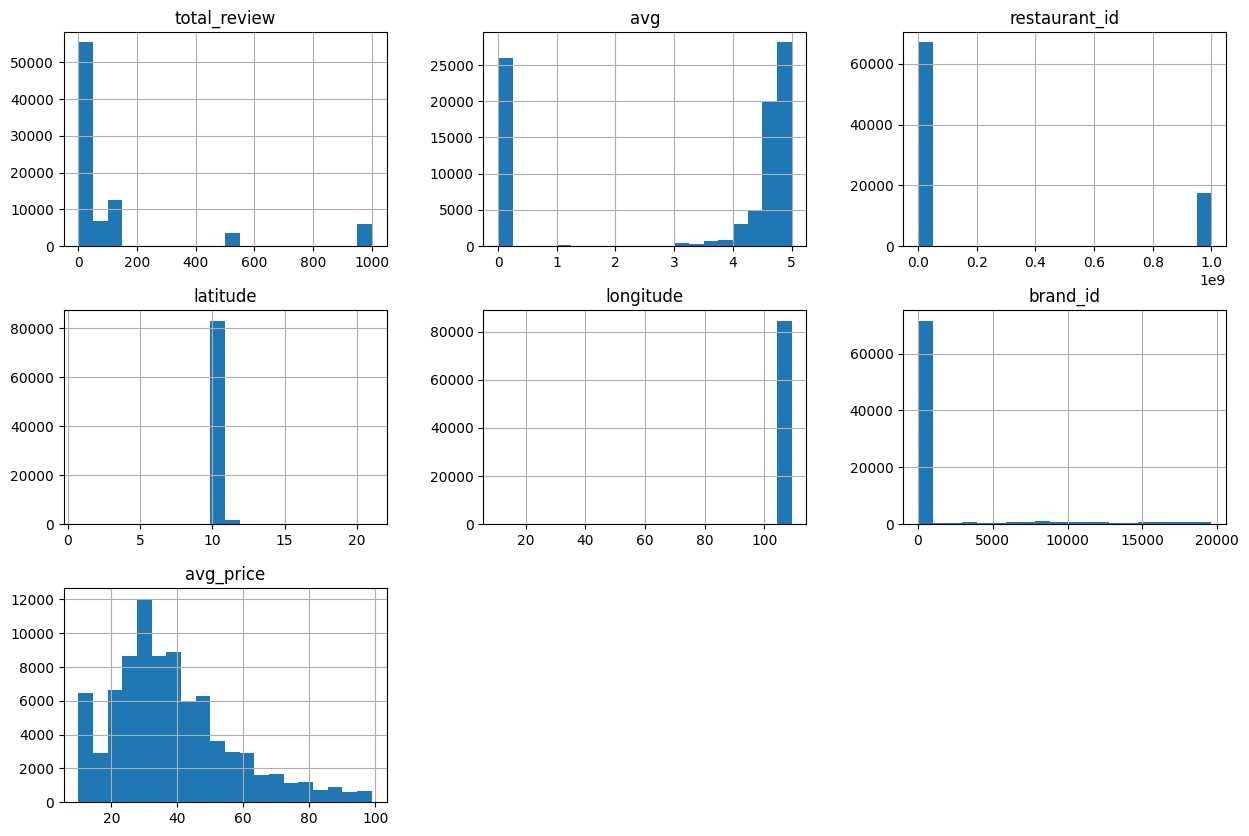

In [7]:
df.hist(figsize=(15, 10), bins=20)
plt.show()

- Thống kê các giá trị phân loại

In [8]:
print(df['categories'].value_counts())
print("-"*80)
print(df['district'].value_counts())

categories
Quán ăn                          41935
Café/Dessert                     19153
Ăn vặt/vỉa hè                     9839
Shop Online                       3237
Nhà hàng                          1457
                                 ...  
Bar/Pub, Shop Online                 2
Café/Dessert, Chăm sóc da            2
Café/Dessert, Nhà thuốc              2
Café/Dessert, Billiards              2
Tiệm bánh, Giao cơm văn phòng        2
Name: count, Length: 105, dtype: int64
--------------------------------------------------------------------------------
district
Thành Phố Thủ Đức    9716
Bình Thạnh           8372
Gò Vấp               8060
Tân Bình             6723
Tân Phú              5813
Quận 7               5537
Quận 1               5066
Bình Tân             4733
Quận 3               4002
Quận 10              3919
Quận 8               3375
Phú Nhuận            3316
Quận 12              3074
Quận 6               2539
Quận 11              2410
Quận 4               2261
Quận 5         

- Thống kê categories (loại hình) phổ biến

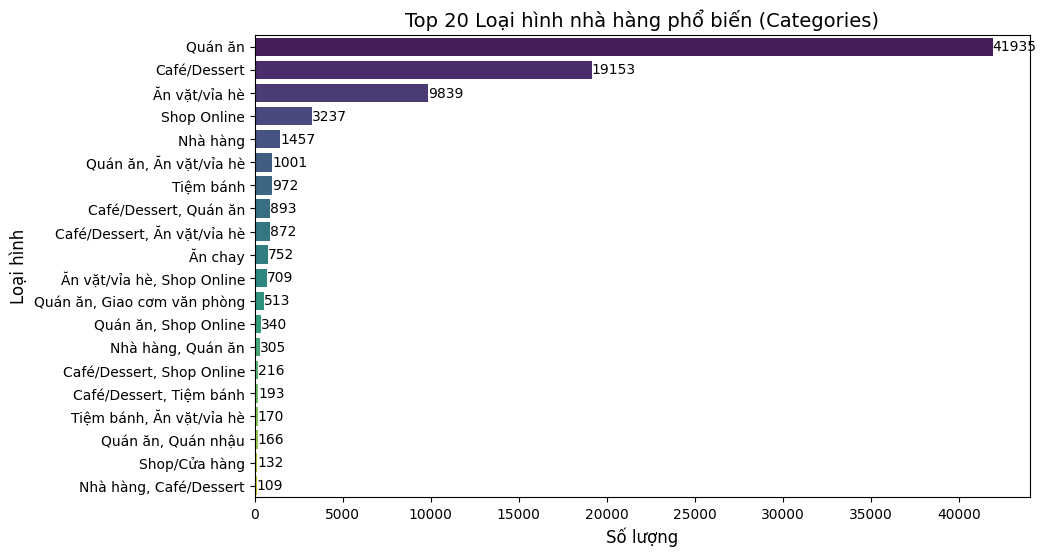

In [9]:
# Lấy Top 20 categories phổ biến nhất
top_categories = df['categories'].value_counts().head(20)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")

# Thêm số lượng trên đầu mỗi thanh
for i, value in enumerate(top_categories.values):
    ax.text(value + 1, i, str(value), color='black', va='center', fontsize=10)  # Điều chỉnh vị trí nhãn

# Tùy chỉnh tiêu đề và nhãn
plt.title("Top 20 Loại hình nhà hàng phổ biến (Categories)", fontsize=14)
plt.xlabel("Số lượng", fontsize=12)
plt.ylabel("Loại hình", fontsize=12)
plt.show()


- Biểu đồ cột thể hiện số lượng nhà hàng quán ăn của các quận huyện trong thành phố Hồ Chí Minh

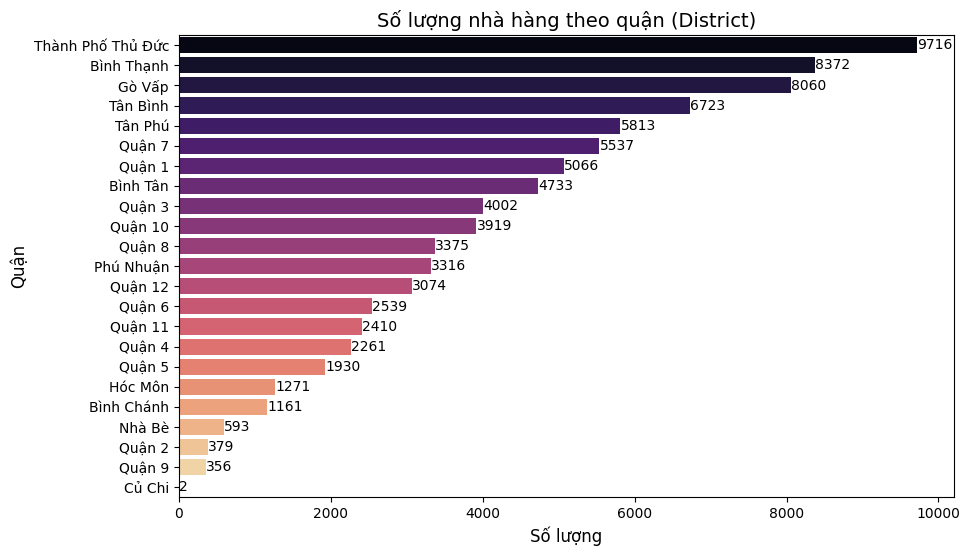

In [10]:
# Đếm tần suất
district_counts = df['district'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=district_counts.values, y=district_counts.index, palette="magma")

# Thêm số lượng trên đầu mỗi thanh
for i, value in enumerate(district_counts.values):
    ax.text(value + 1, i, str(value), color='black', va='center', fontsize=10)  # Điều chỉnh vị trí nhãn

# Tùy chỉnh tiêu đề và nhãn
plt.title("Số lượng nhà hàng theo quận (District)", fontsize=14)
plt.xlabel("Số lượng", fontsize=12)
plt.ylabel("Quận", fontsize=12)
plt.show()


# <div style="padding:20px;color:white;margin:0;font-size:40px;font-family: helvetica;text-align:left;display:fill; border-radius:5px;background-color:#2e8b57;overflow:hidden"><b>Trực quan hóa dữ liệu</b></div>

## **1. Phân phối các biến số**

- Phân phối cột `avg_price` (giá trung bình)

Biểu đồ này giúp xác định mức giá phổ biến mà khách hàng có thể gặp phải, đồng thời phản ánh mức độ phổ biến của các mức giá trong thị trường F&B.

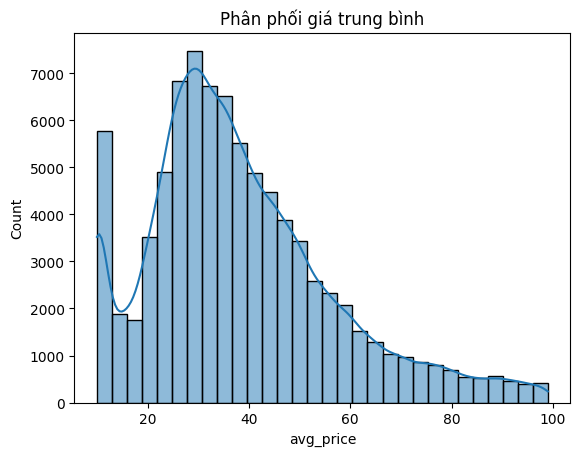

In [11]:
sns.histplot(df['avg_price'], bins=30, kde=True)
plt.title('Phân phối giá trung bình')
plt.show()

**Nhận xét**:
- Phân phối không đối xứng: Dữ liệu có một đỉnh chính ở khoảng giá từ 15 đến 30, với số lượng lớn các nhà hàng có giá trung bình trong phạm vi này. Sau đó, tần suất giảm dần khi giá trị tăng lên.
- Đuôi phân phối dài: Các giá trị cao (trên 50) có số lượng rất ít, cho thấy ít có nhà hàng hoặc quán ăn có mức giá cao.
- Dễ dàng nhận ra một sự tập trung ở mức giá vừa phải: Phần lớn các nhà hàng có giá trong khoảng từ 20 đến 40, điều này có thể phản ánh sự phổ biến của các lựa chọn giá cả phải chăng đối với khách hàng.

- Phân phối cột `avg` (đánh giá trung bình)

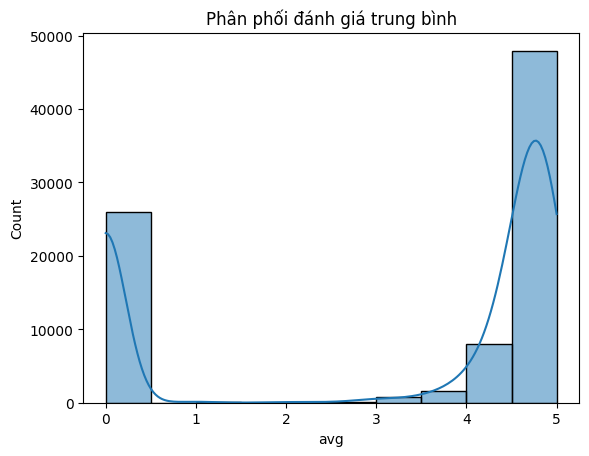

In [12]:
sns.histplot(df['avg'], bins=10, kde=True)
plt.title('Phân phối đánh giá trung bình')
plt.show()


**Nhận xét**:
- Phân phối không đối xứng: Đánh giá trung bình chủ yếu tập trung ở hai cực: 0 và 5, với số lượng lớn các nhà hàng có điểm đánh giá ở mức này.
- Thiên lệch về đánh giá cao: Phần lớn các nhà hàng có đánh giá trung bình từ 4 đến 5, cho thấy sự ưu ái hoặc hài lòng của khách hàng.
- Giá trị bằng 0 đáng chú ý: Rất nhiều nhà hàng có đánh giá trung bình bằng 0, có thể do không có đánh giá nào.

Biểu đồ này giúp xác định sự phổ biến của các nhà hàng được đánh giá cao, đồng thời chỉ ra sự phân bố không đồng đều trong dữ liệu đánh giá.

## **2. Từ khóa phổ biến**

- Phân tích từ khóa trong tên nhà hàng

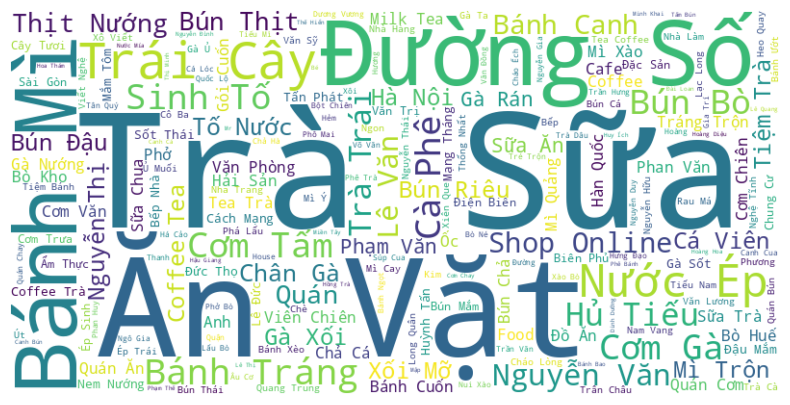

In [13]:
text = ' '.join(df['name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Nhận xét**
- Phân bố từ khoá: Biểu đồ WordCloud cho thấy các từ khoá phổ biến nhất trong tên nhà hàng hoặc quán ăn. Các từ xuất hiện với kích thước lớn hơn thể hiện tần suất xuất hiện cao trong dữ liệu.
- Xu hướng đặt tên: Những từ thông dụng như "Bánh mì", "Cơm Tấm", "Trái cây", "Ăn vặt" hoặc các từ liên quan đến món ăn và loại hình quán ăn có chiếm ưu thế, phản ánh phong cách đặt tên phổ biến trong ngành F&B.

## **3. Mối quan hệ giữa các biến**

### 3.1  Ma trận tương quan cho các cột dữ liệu số

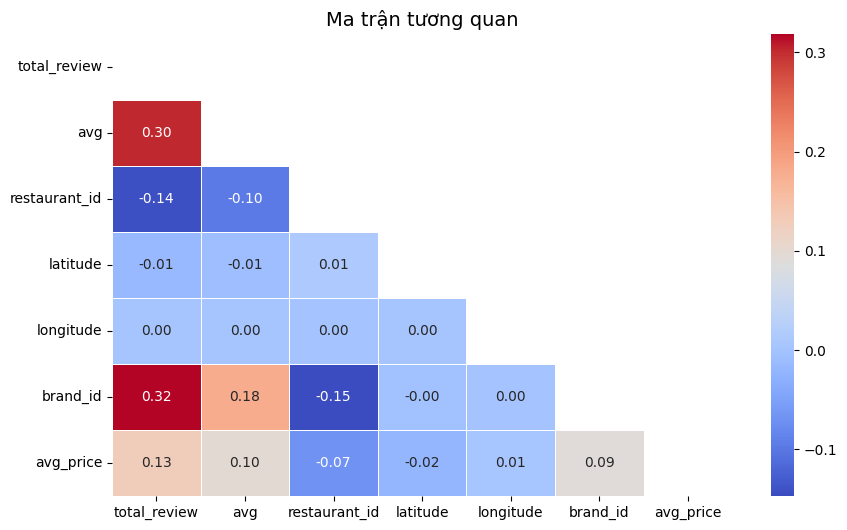

In [14]:
# Chỉ chọn các cột số
numeric_data = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan
corr = numeric_data.corr()

# Che giấu nửa trên của ma trận
mask = np.triu(np.ones_like(corr, dtype=bool))  # Tạo mặt nạ tam giác trên

# Vẽ heatmap với mặt nạ
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)
plt.title('Ma trận tương quan', fontsize=14)
plt.show()


**Nhận xét**
- Có mối tương quan giữa total_review với brand_id và avg

### 3.2 Biểu đồ phân tán cho các cặp biến số

- Mối quan hệ giữa giá (`avg_price`)  và đánh giá (`avg`)

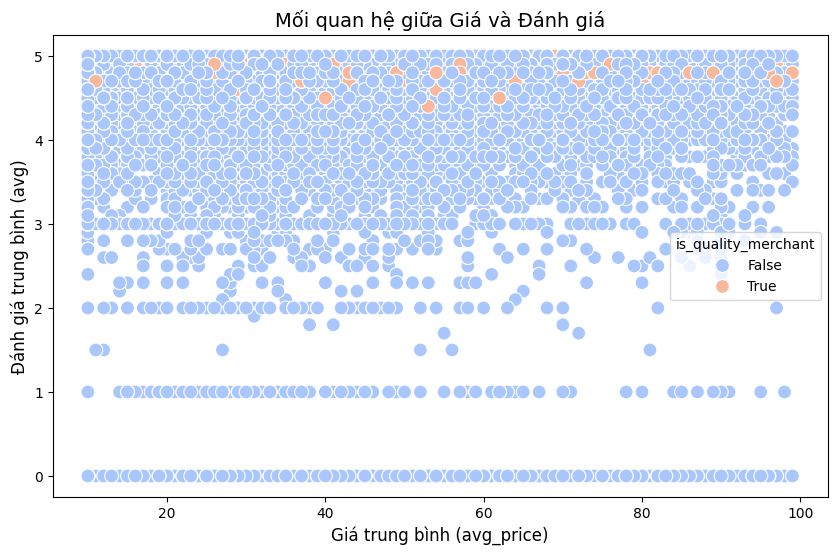

In [15]:
# Biểu đồ phân tán giữa avg_price và avg
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_price', y='avg', hue='is_quality_merchant', palette='coolwarm', s=100)
plt.title('Mối quan hệ giữa Giá và Đánh giá', fontsize=14)
plt.xlabel('Giá trung bình (avg_price)', fontsize=12)
plt.ylabel('Đánh giá trung bình (avg)', fontsize=12)
plt.show()

**Nhận xét**
- Không có mối tương quan rõ ràng giữa đánh giá trung bình và giá cả trung bình của nhà hàng

- Mối quan hệ giữa số lượng đánh giá (`total_review`)  và đánh giá (`avg`)

Một mối quan hệ thú vị là sự ảnh hưởng của số lượng đánh giá đến đánh giá trung bình của nhà hàng.

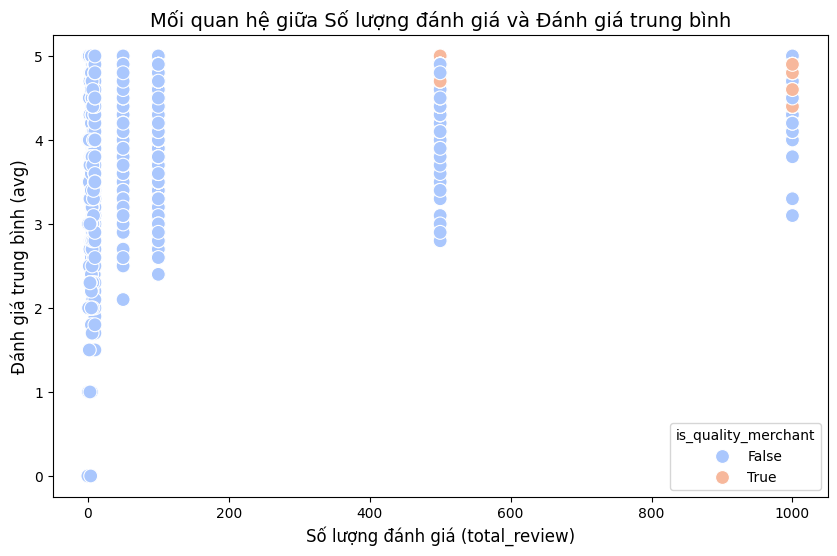

In [16]:
# Biểu đồ phân tán giữa total_review và avg
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_review', y='avg', hue='is_quality_merchant', palette='coolwarm', s=100)
plt.title('Mối quan hệ giữa Số lượng đánh giá và Đánh giá trung bình', fontsize=14)
plt.xlabel('Số lượng đánh giá (total_review)', fontsize=12)
plt.ylabel('Đánh giá trung bình (avg)', fontsize=12)
plt.show()


## **4. Phân tích tổng quan các mối quan hệ giữa các loại hình kinh doanh và các quận**

### 4.1 Phân tích số lượng nhà hàng theo từng quận và loại hình

**Mục tiêu**:
- Phân tích số lượng nhà hàng của từng loại hình (category) trong mỗi quận. Biểu đồ này giúp xác định được sự phân bổ của các loại hình kinh doanh F&B trong các quận khác nhau.
- Biểu đồ sẽ chỉ ra quận nào có số lượng nhà hàng lớn nhất cho mỗi loại hình, giúp người làm kinh doanh nhận diện được các khu vực có tiềm năng cao và khu vực cạnh tranh khốc liệt.
- Các quận có thể có sự phân bố số lượng nhà hàng rất khác nhau, vì vậy việc phân tích này cho phép đánh giá mức độ phát triển của các loại hình F&B trong từng khu vực.

**Lợi ích đối với người làm kinh doanh trong lĩnh vực F&B**:
- Cơ hội mở rộng: Nếu một quận có ít nhà hàng trong một loại hình cụ thể, đây có thể là cơ hội để mở rộng thêm một chi nhánh hoặc một mô hình kinh doanh tương tự.
- Chiến lược phân phối: Việc hiểu rõ các quận có số lượng nhà hàng lớn giúp xác định khu vực có tiềm năng hoặc cần mở rộng trong tương lai.
- Quản lý và phân phối nguồn lực: Việc phân tích số lượng nhà hàng giúp bạn phân bổ nguồn lực marketing và sản phẩm phù hợp với số lượng đối thủ trong khu vực.

Trước tiên, chúng ta sẽ xác định số lượng nhà hàng theo từng quận và loại hình để hiểu được sự phân bổ của các nhà hàng.

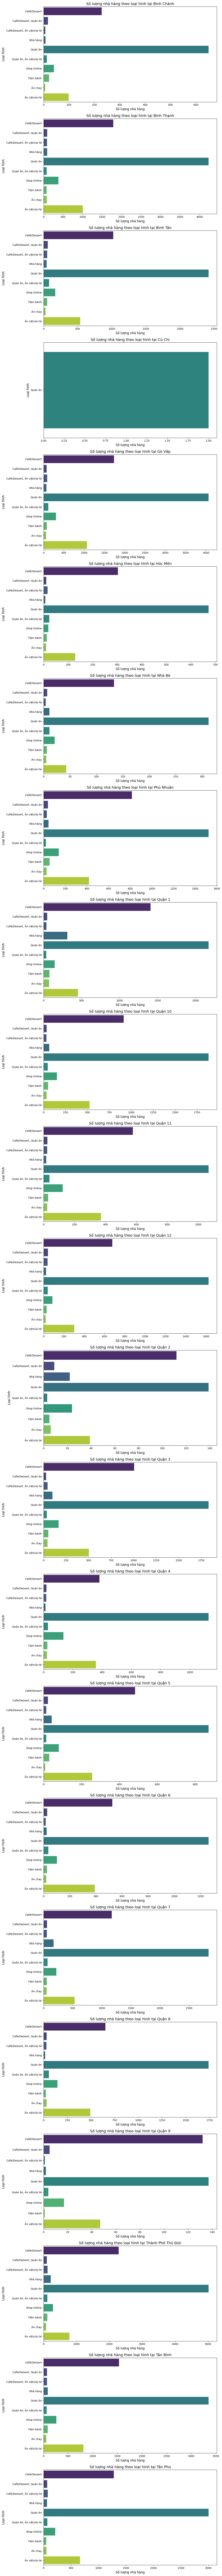

In [17]:
# Lấy số lượng nhà hàng theo từng quận và loại hình (categories)
category_district_counts = df.groupby(['district', 'categories']).size().reset_index(name='count')

# Lọc lấy top 10 loại hình phổ biến nhất
top_categories = df['categories'].value_counts().head(10).index

# Lọc dữ liệu theo top 10 loại hình
category_district_counts = category_district_counts[category_district_counts['categories'].isin(top_categories)]

# Lấy danh sách các quận duy nhất
districts = category_district_counts['district'].unique()

# Tạo figure và subplots, mỗi quận một subplot
fig, axes = plt.subplots(len(districts), 1, figsize=(12, 6 * len(districts)))

# Nếu chỉ có một quận, axes sẽ là một đối tượng (không phải mảng), cần điều chỉnh
if len(districts) == 1:
    axes = [axes]

# Vẽ biểu đồ cho mỗi quận
for i, district in enumerate(districts):
    ax = axes[i]
    district_data = category_district_counts[category_district_counts['district'] == district]
    
    sns.barplot(x='count', y='categories', data=district_data, ax=ax, palette='viridis')
    ax.set_title(f"Số lượng nhà hàng theo loại hình tại {district}", fontsize=14)
    ax.set_xlabel('Số lượng nhà hàng', fontsize=12)
    ax.set_ylabel('Loại hình', fontsize=12)

plt.tight_layout()  # Điều chỉnh các khoảng cách giữa các subplot
plt.show()


### 4.2 Phân tích giá cả từng quận và loại hình

**Mục tiêu**:  
- Biểu đồ này giúp so sánh mức giá của các loại hình F&B trong từng quận. Thông qua việc vẽ boxplot, ta có thể dễ dàng nhận diện được mức giá trung bình, phân bố giá và các giá trị ngoại lai trong từng quận.  
- Việc thống nhất màu sắc cho từng loại hình và vị trí của các loại hình trên trục x giúp dễ dàng so sánh giữa các quận mà không bị nhầm lẫn.  
 

**Lợi ích đối với người làm kinh doanh trong lĩnh vực F&B**:
- Điều chỉnh giá cả: Nếu giá của loại hình mà bạn kinh doanh quá cao so với mức giá trung bình trong khu vực, bạn có thể điều chỉnh để phù hợp hơn, từ đó thu hút khách hàng.
- Xác định đối tượng khách hàng: Việc phân tích giá cả theo từng quận giúp bạn xác định được đối tượng khách hàng trong khu vực đó (ví dụ, khách hàng có mức thu nhập cao có thể dễ dàng chấp nhận mức giá cao hơn).
- Quyết định địa điểm: Những khu vực có mức giá quá cao hoặc quá thấp có thể không phải là lựa chọn lý tưởng nếu bạn muốn mở rộng kinh doanh.

Chúng ta sẽ vẽ biểu đồ để trực quan hóa sự phân bố giá cả (`avg_price`) của các loại hình trong từng quận.

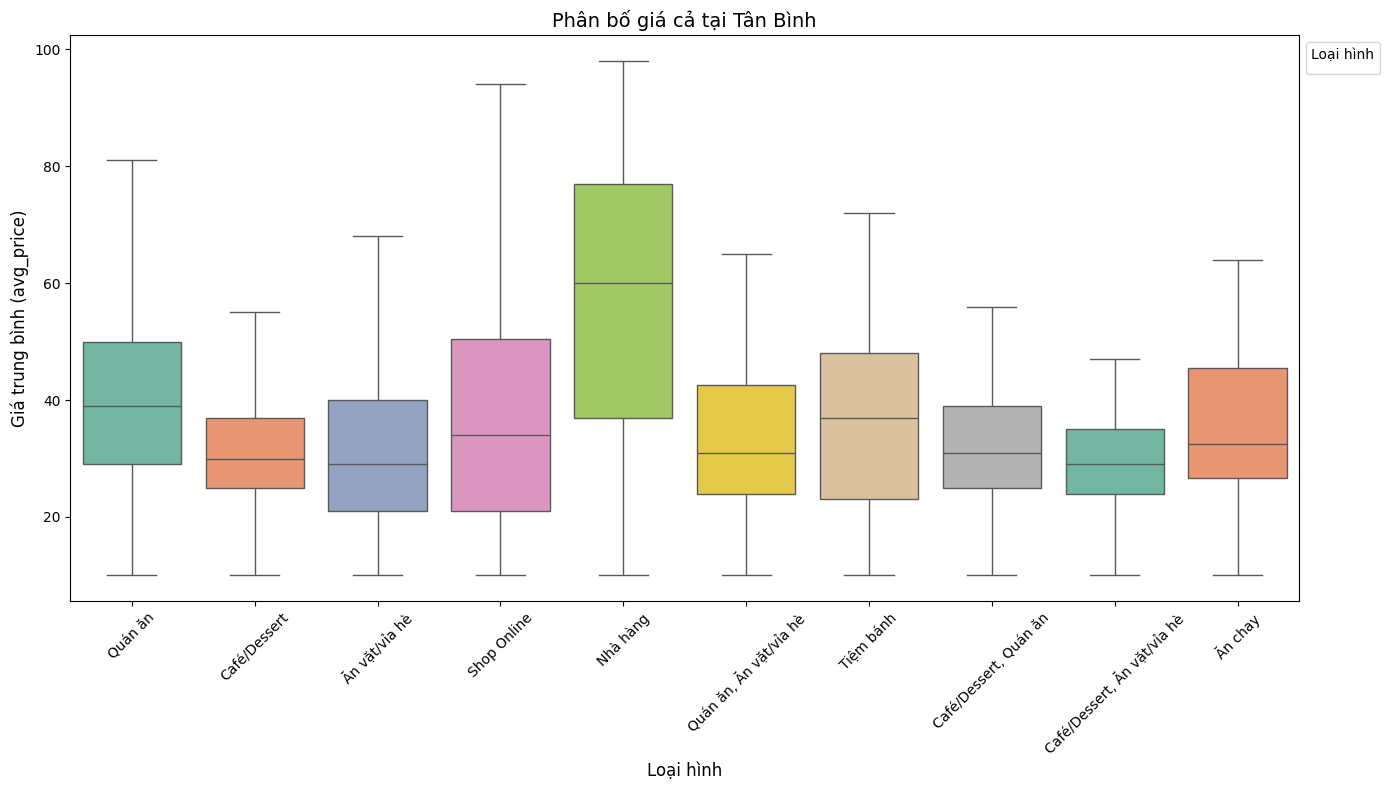

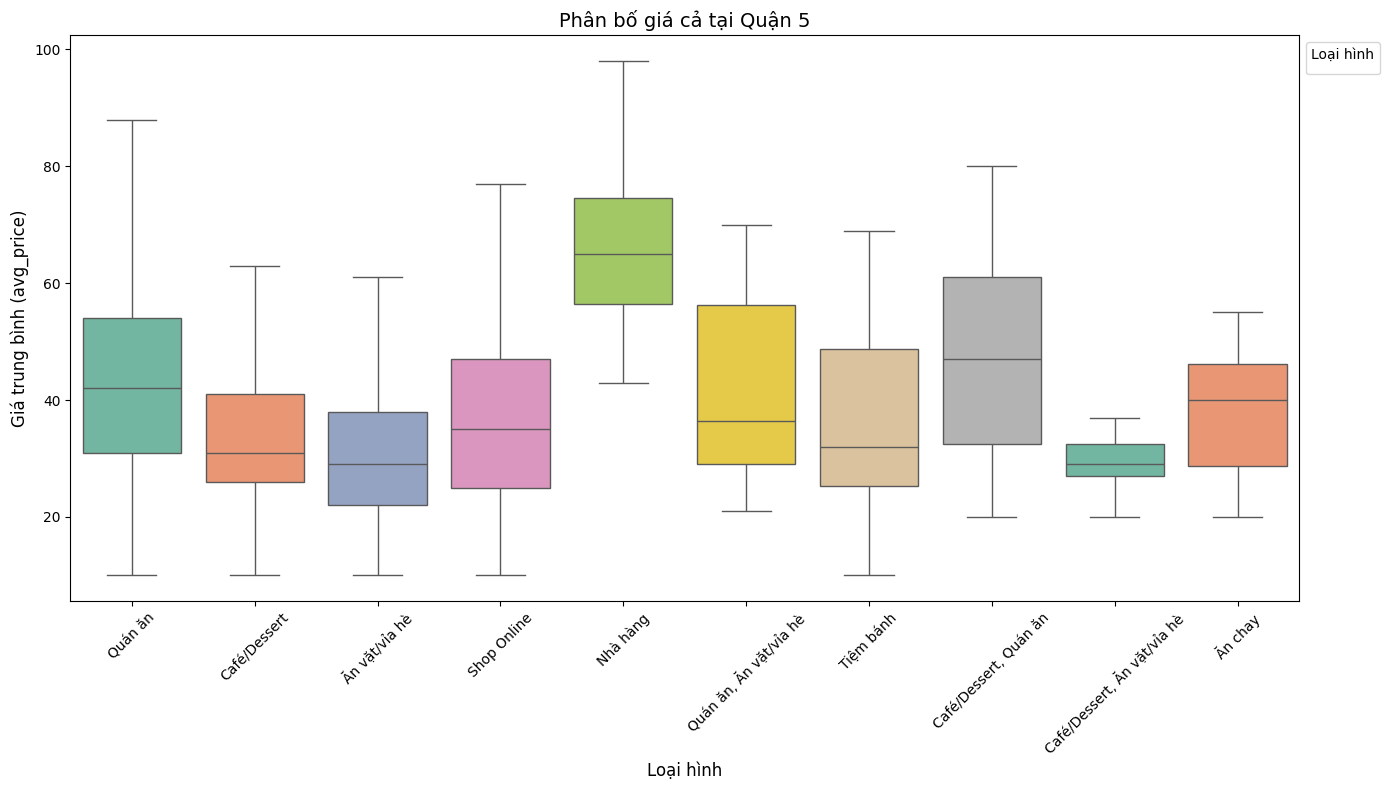

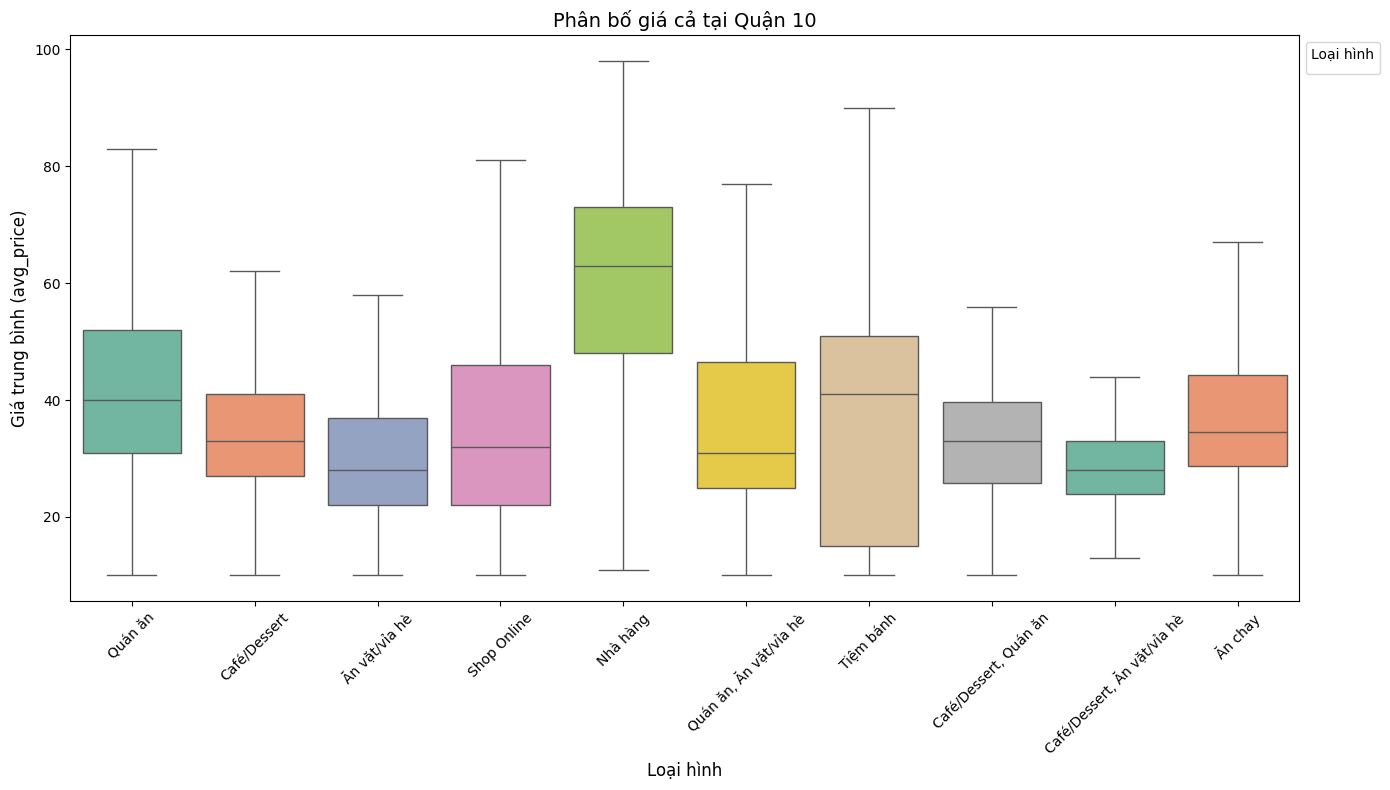

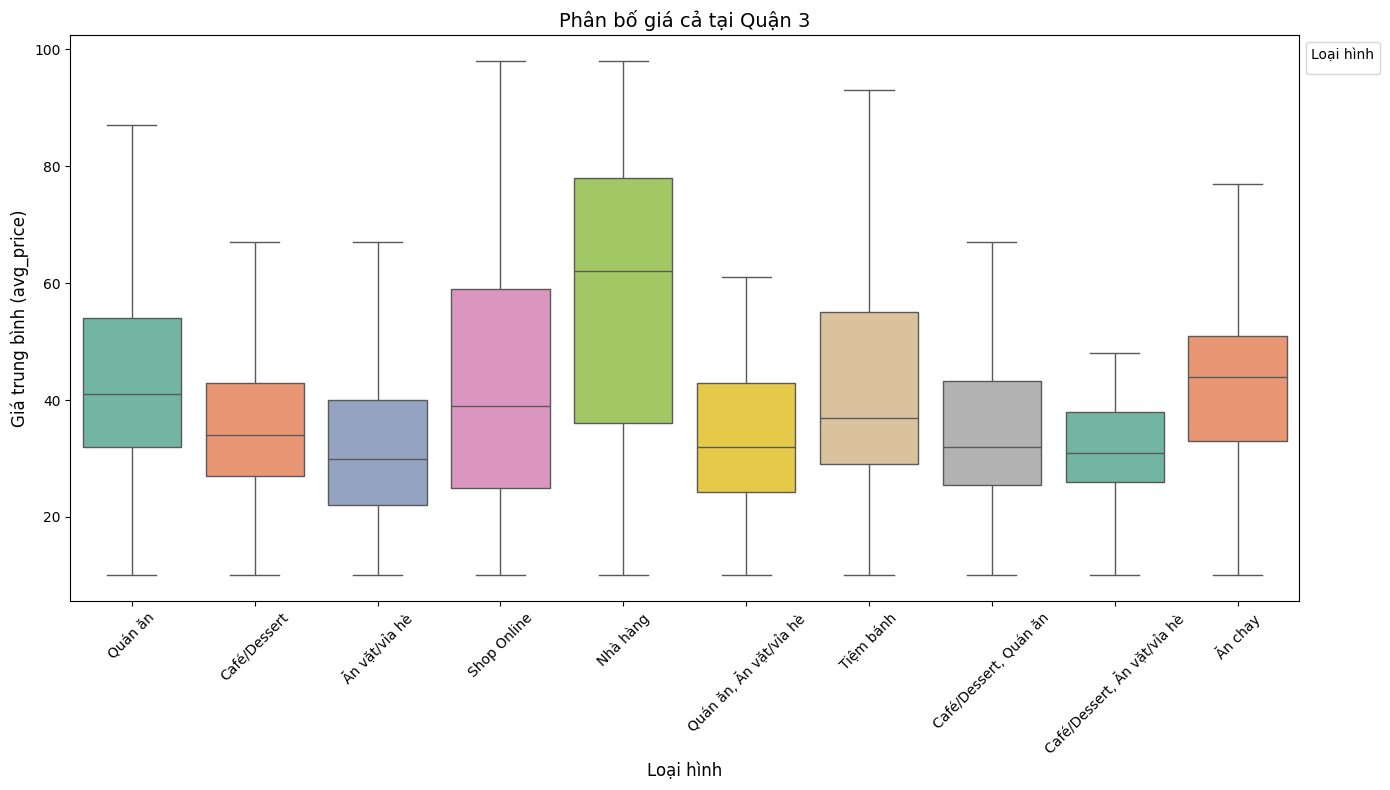

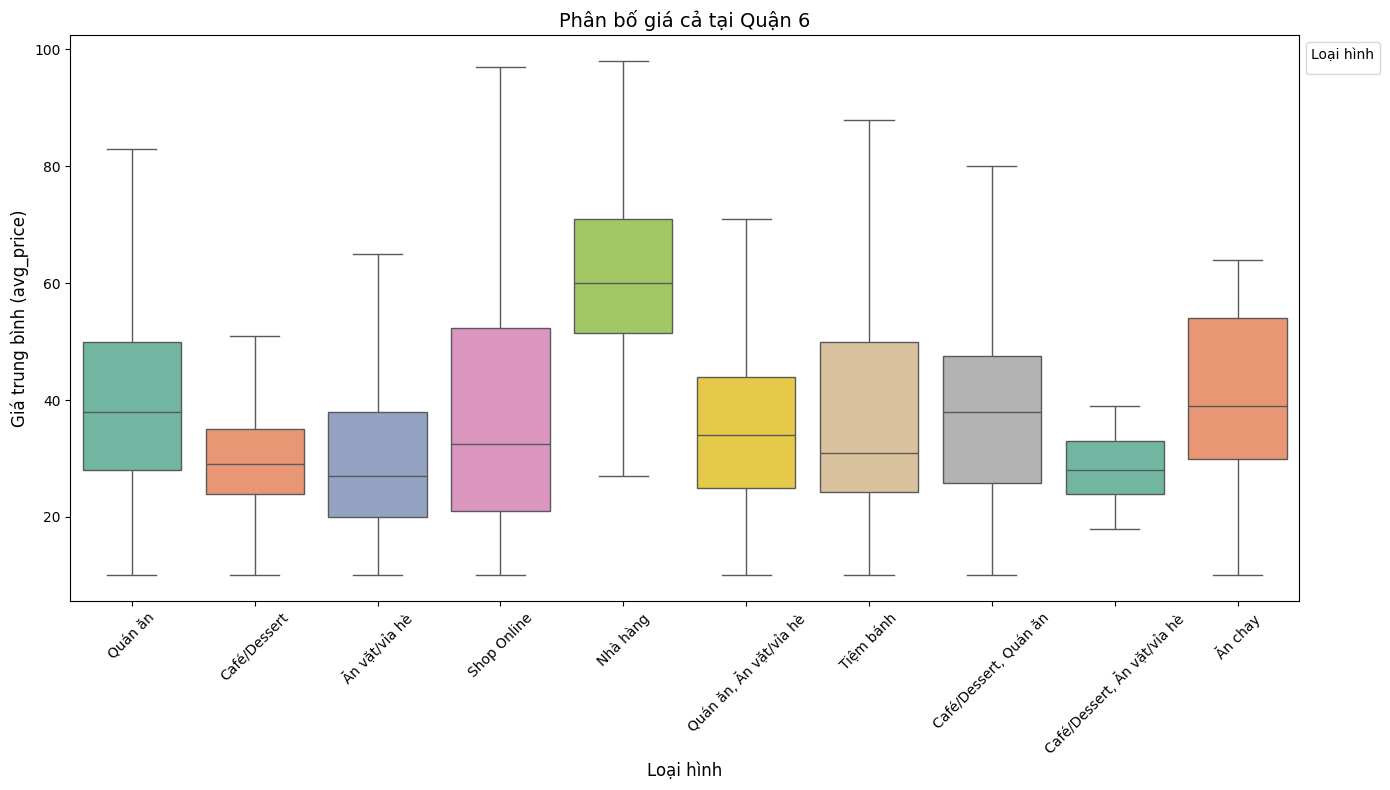

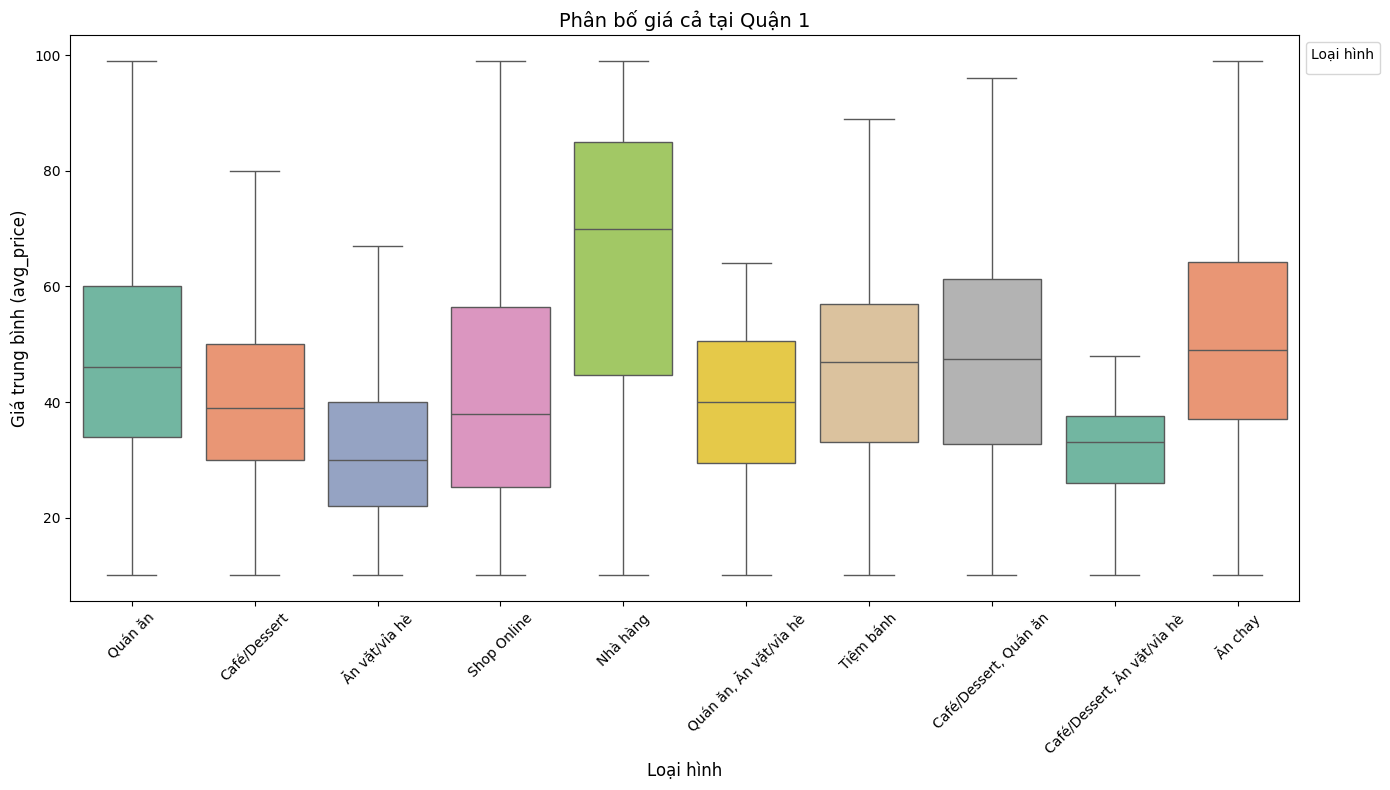

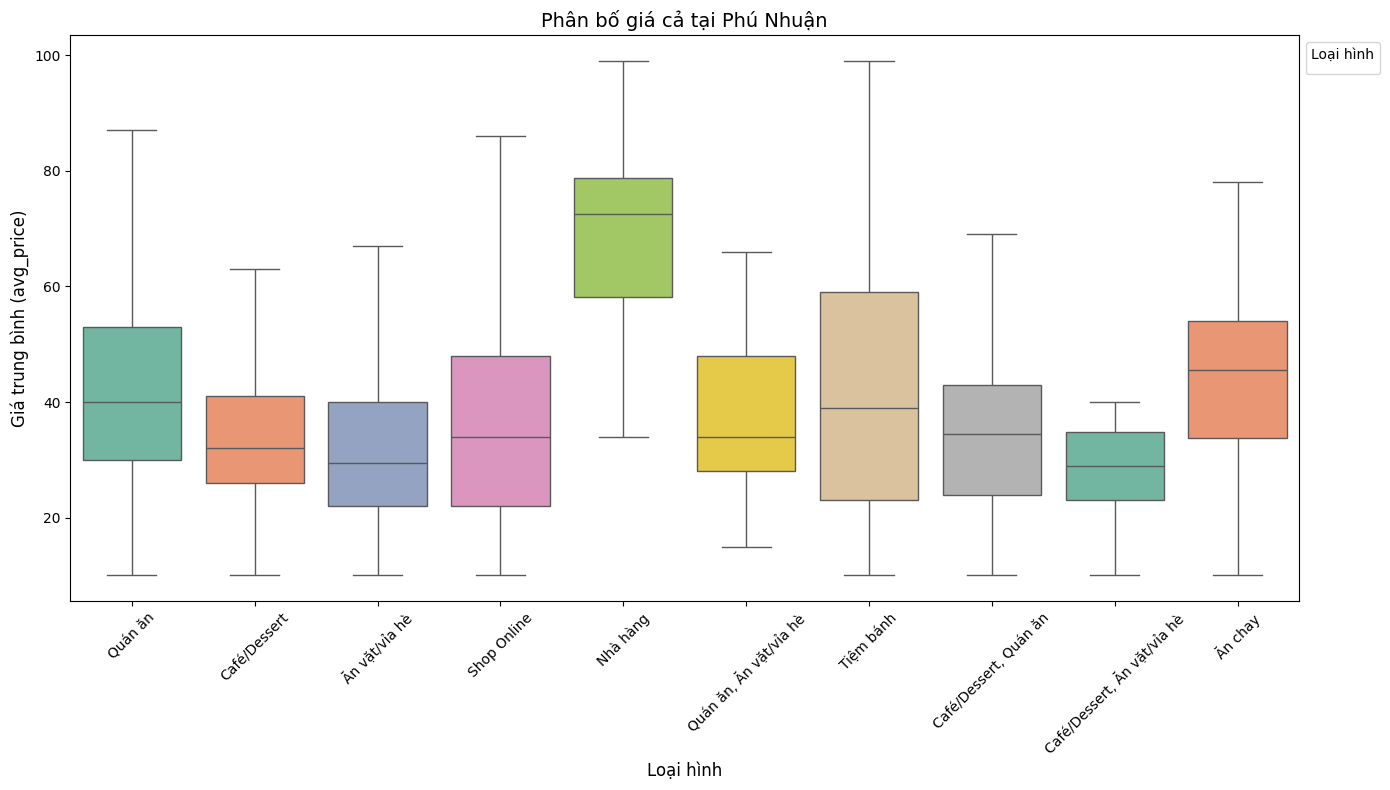

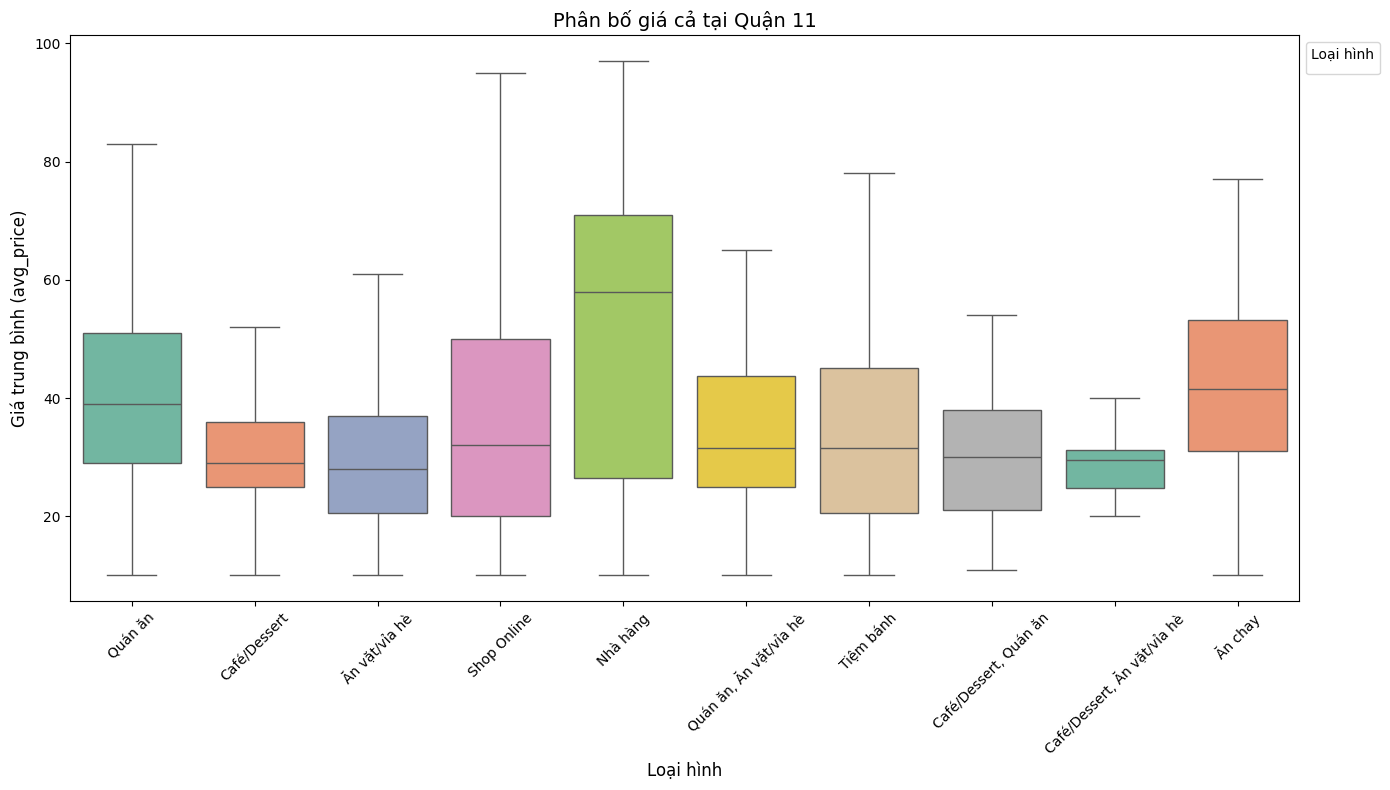

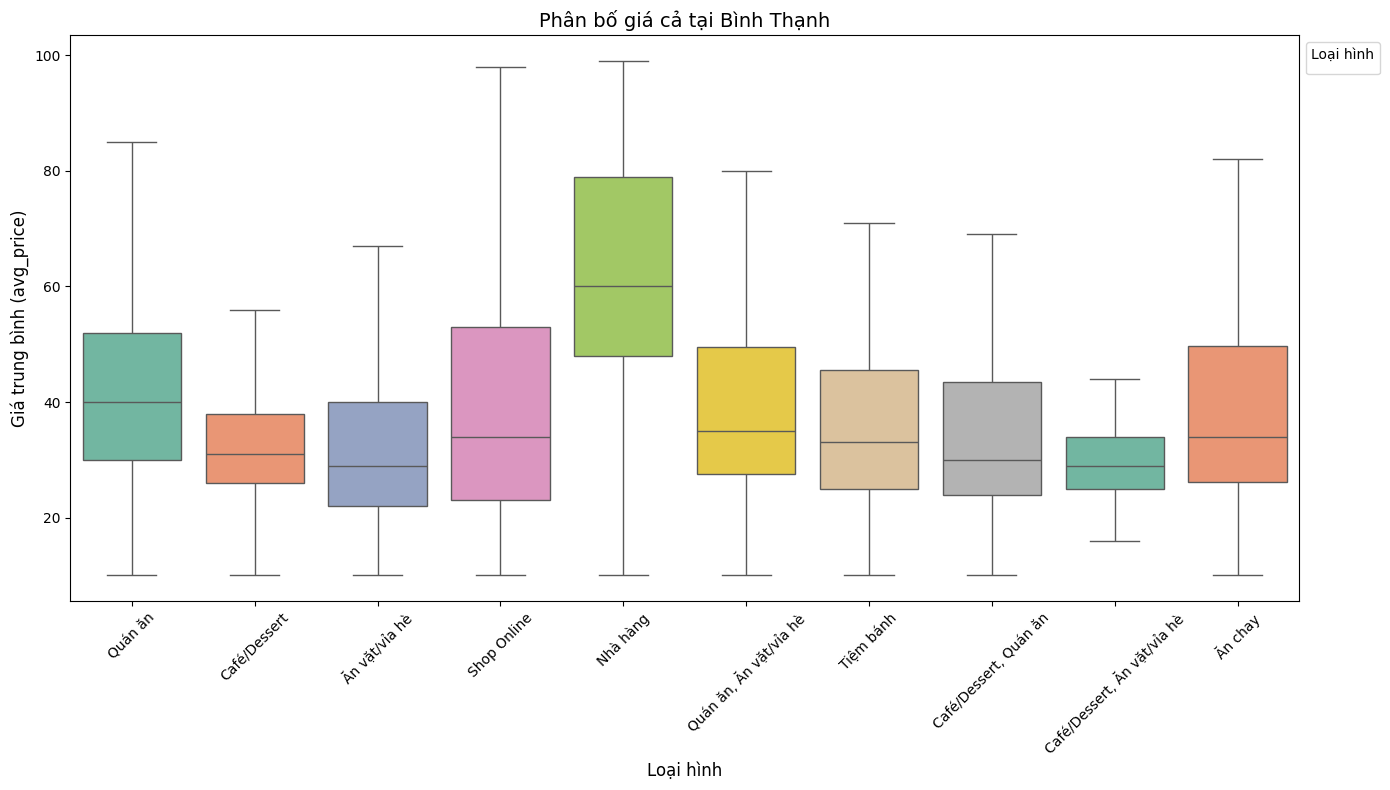

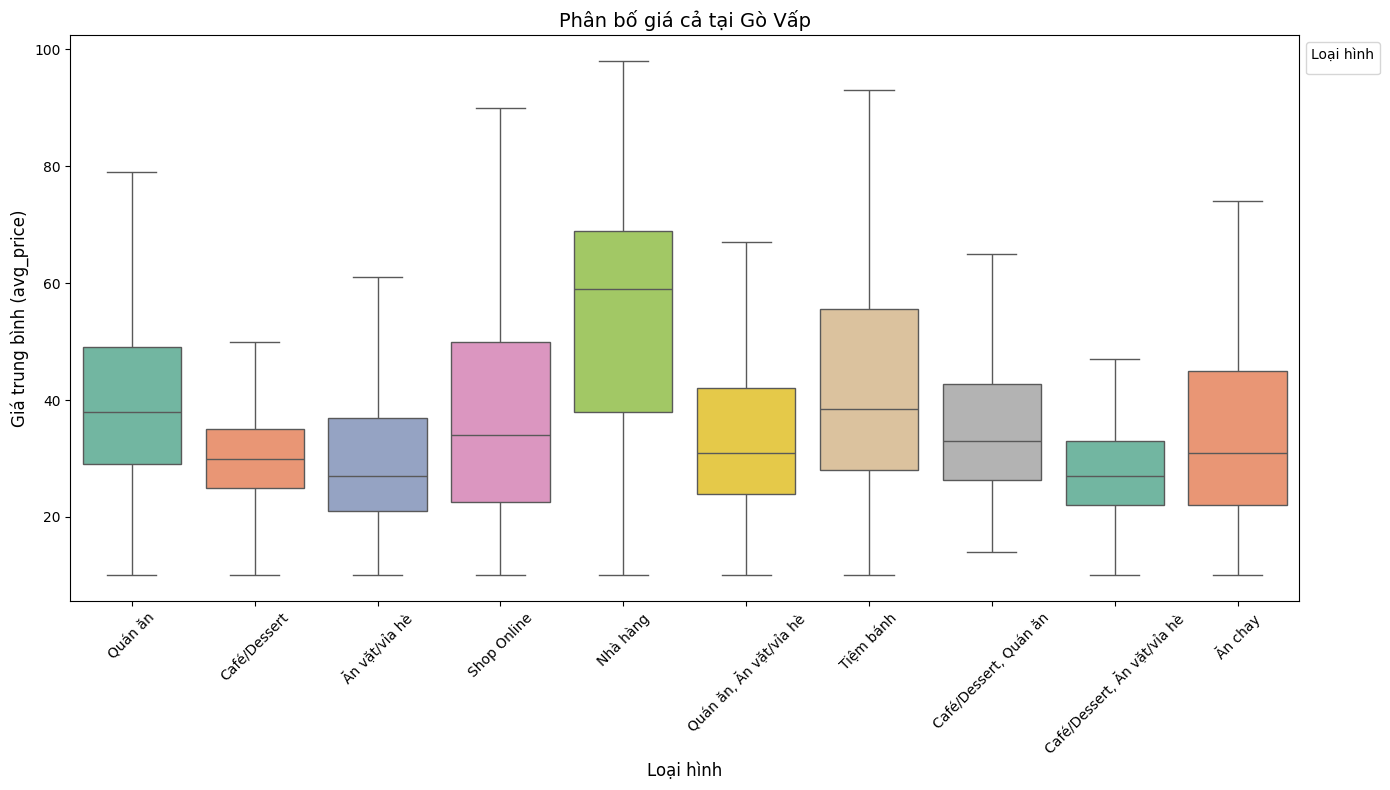

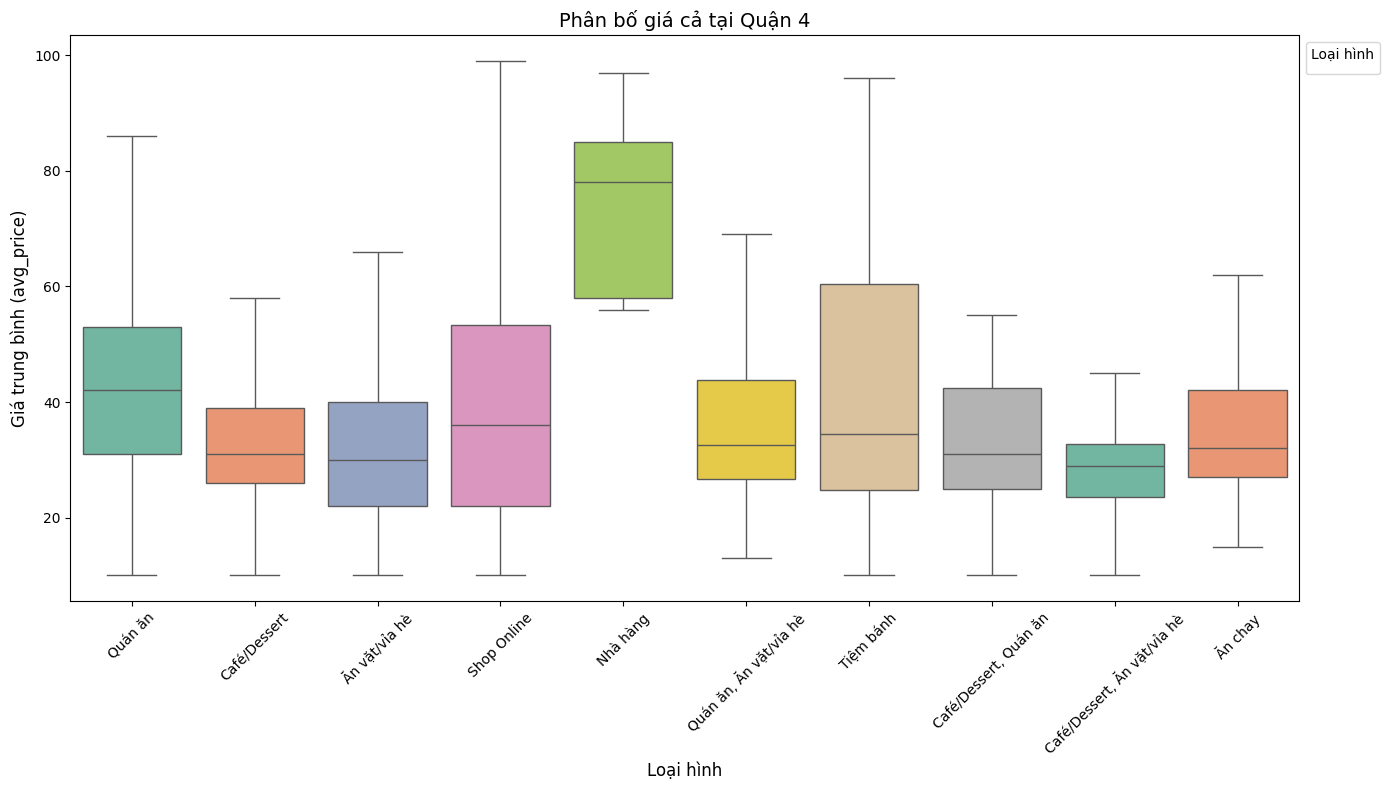

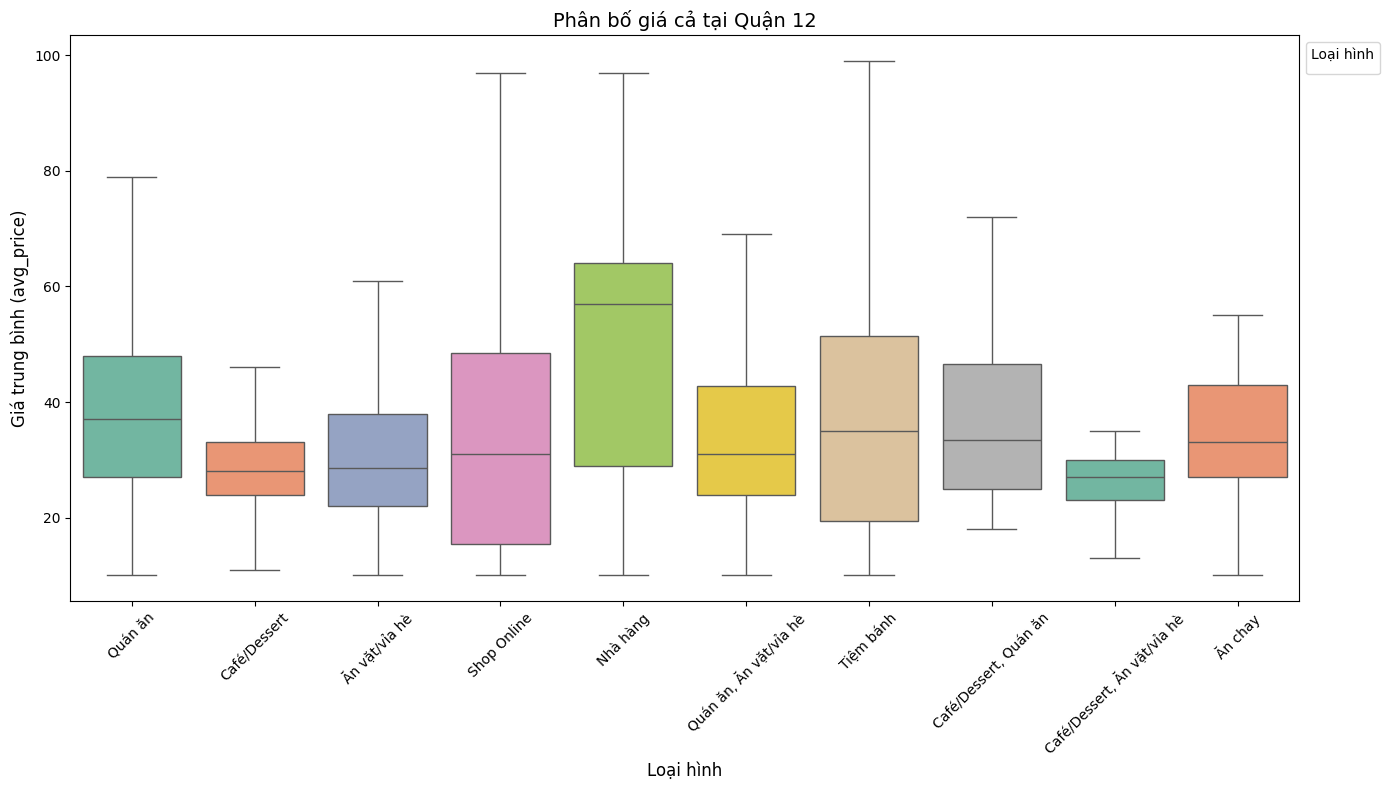

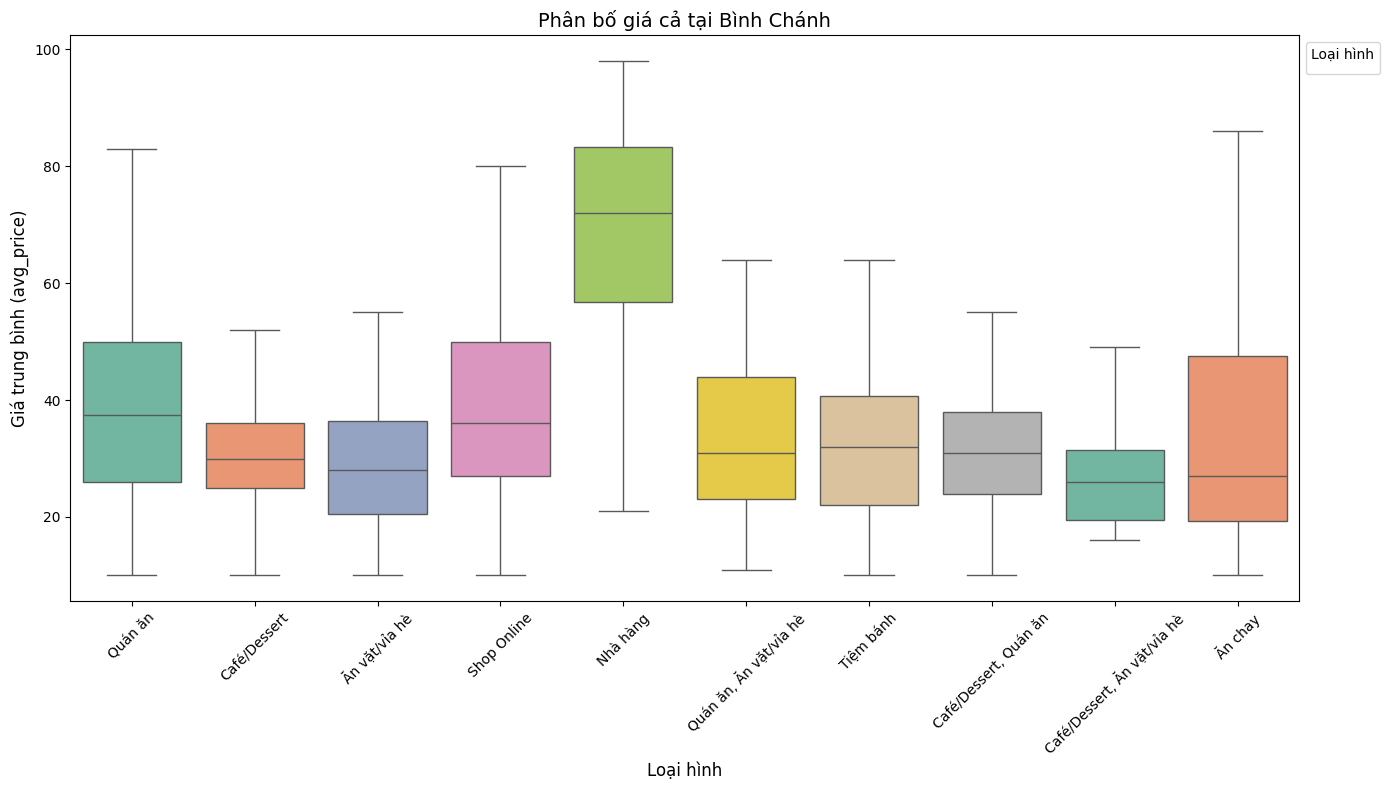

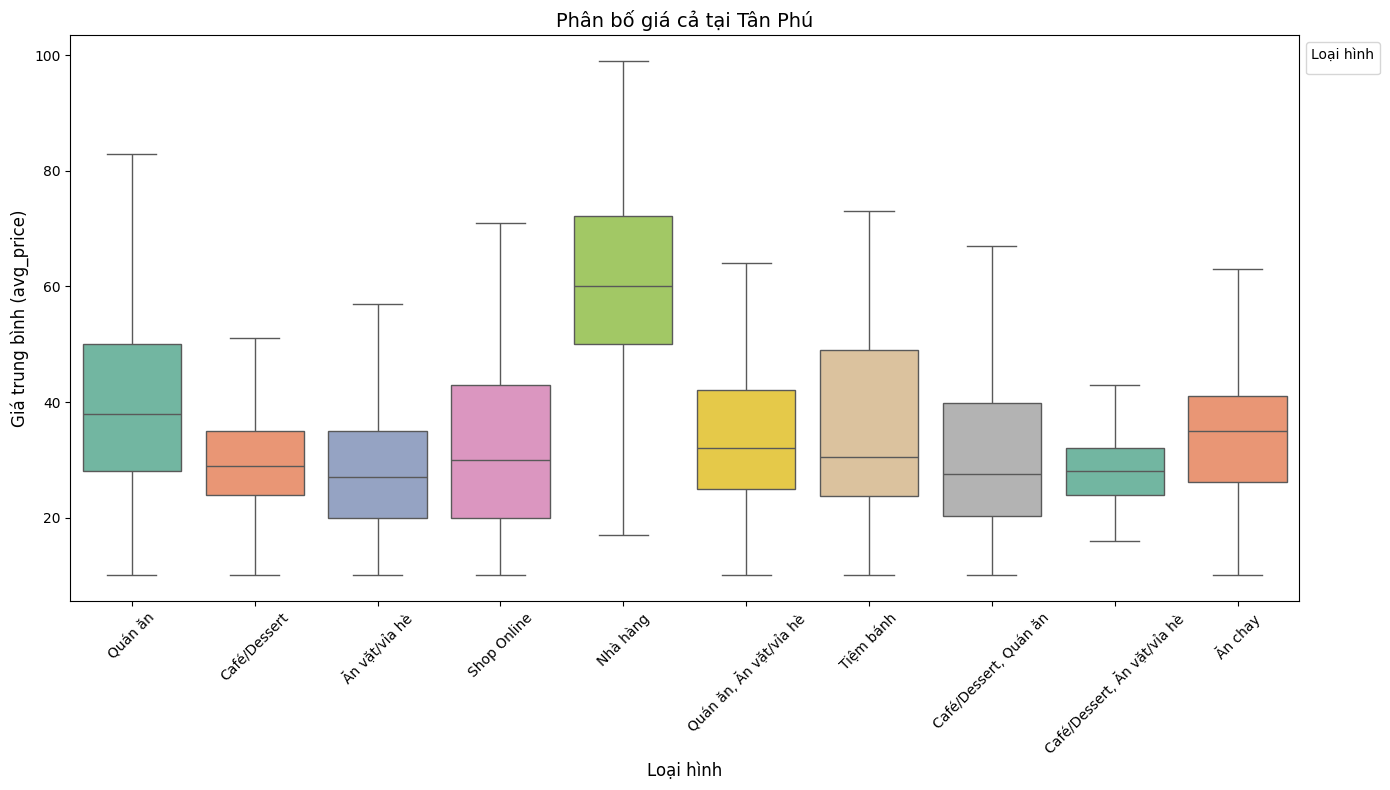

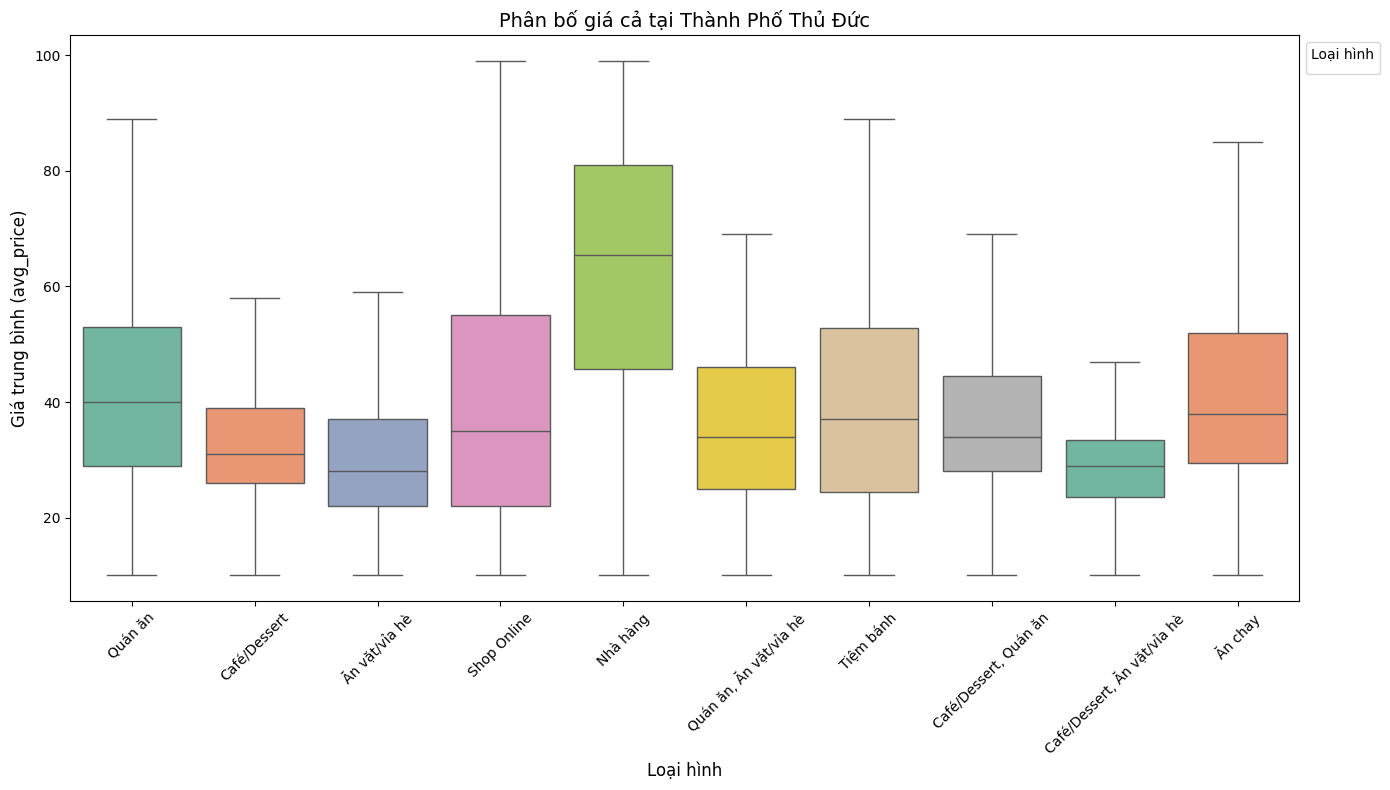

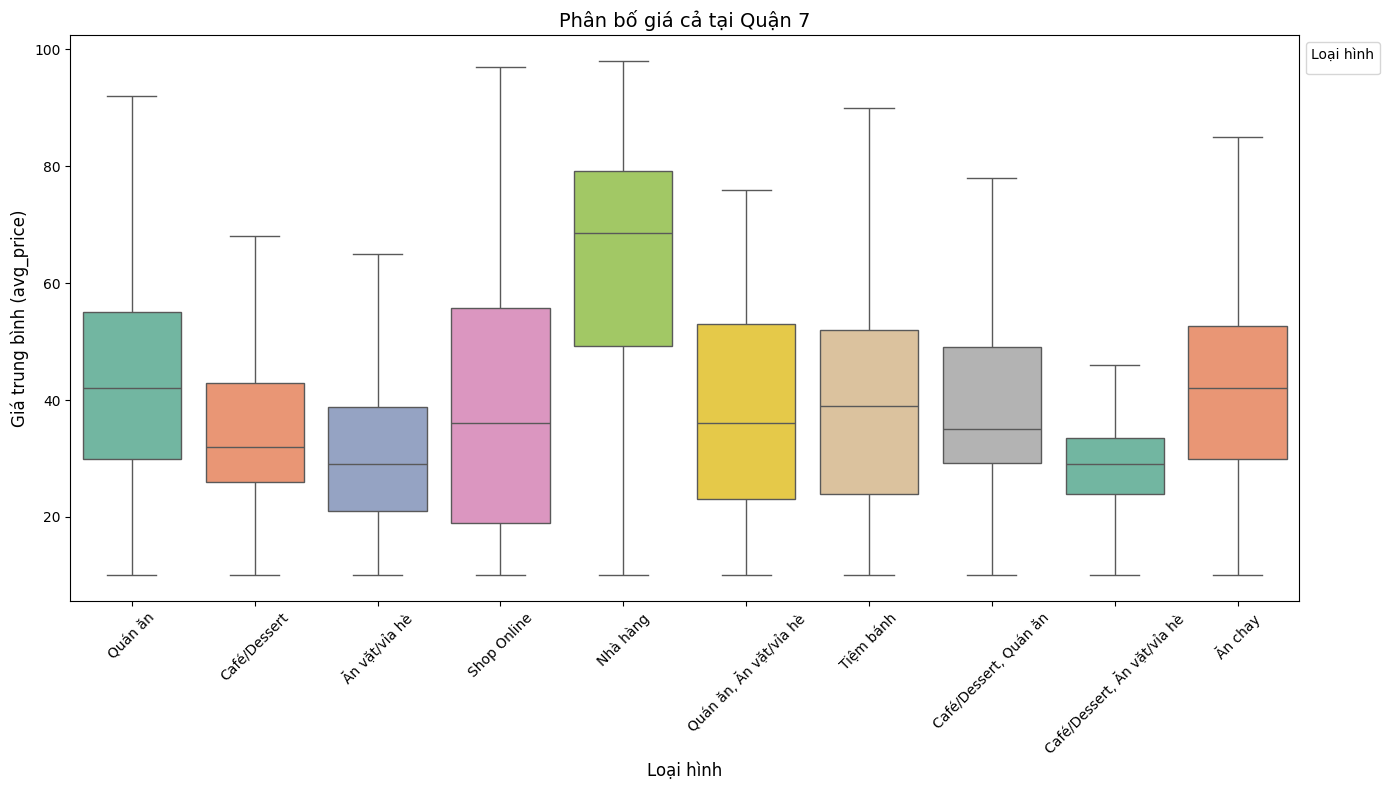

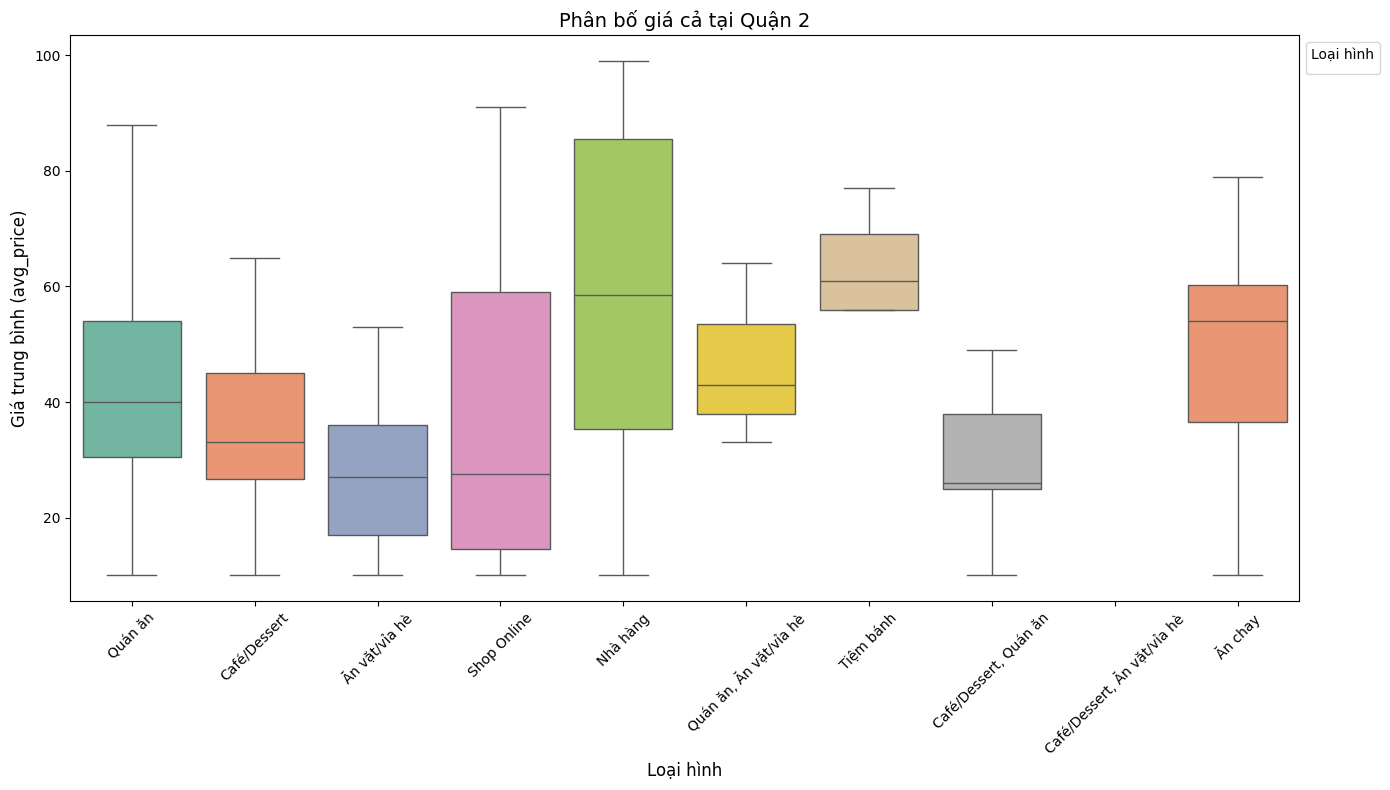

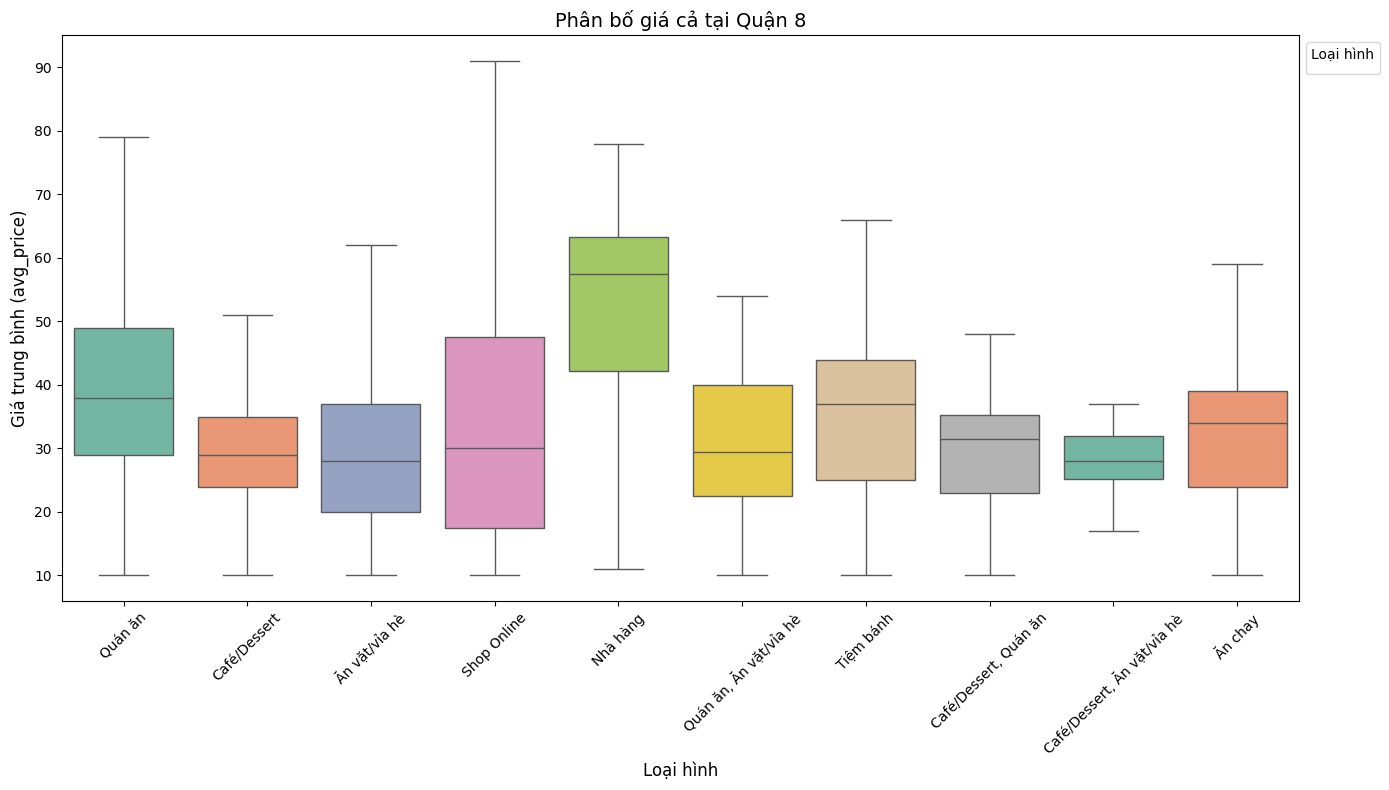

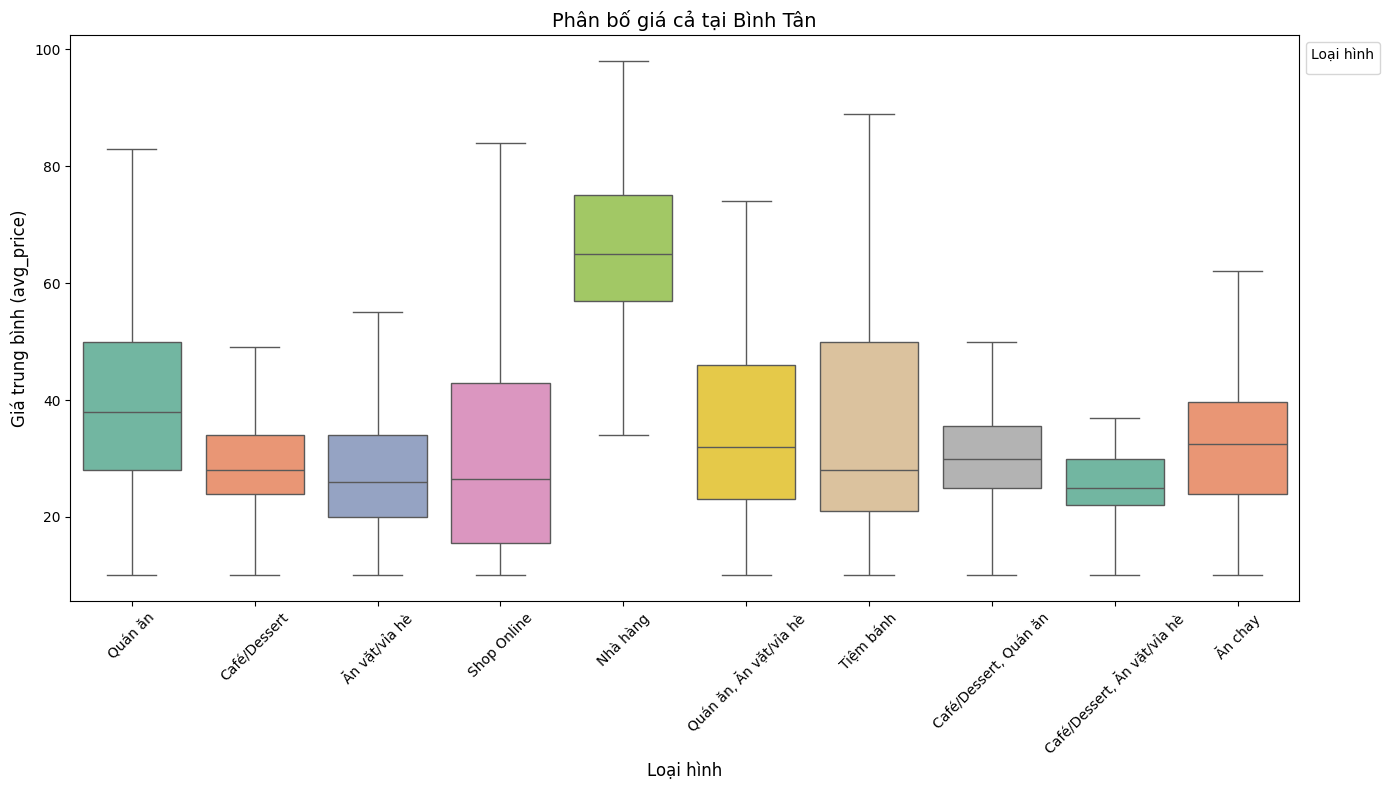

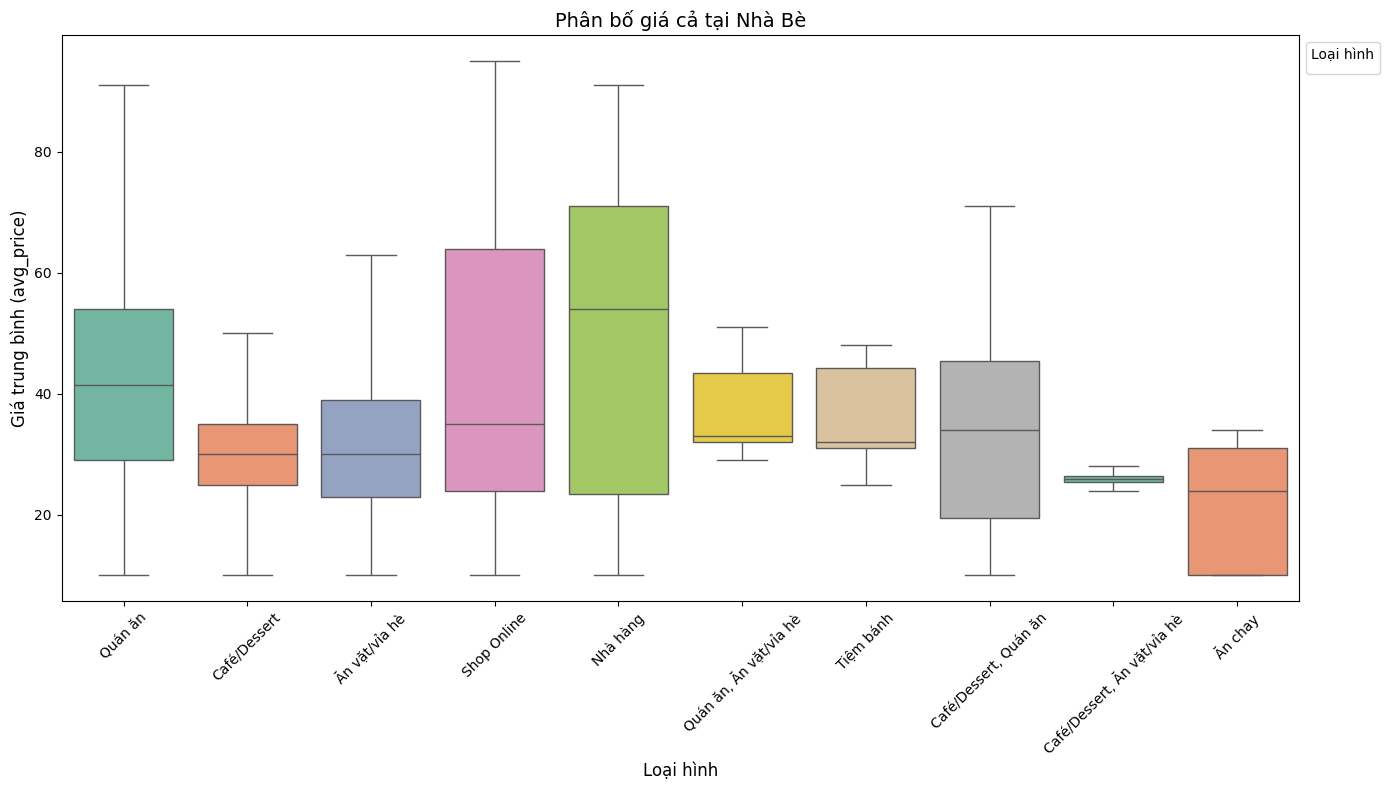

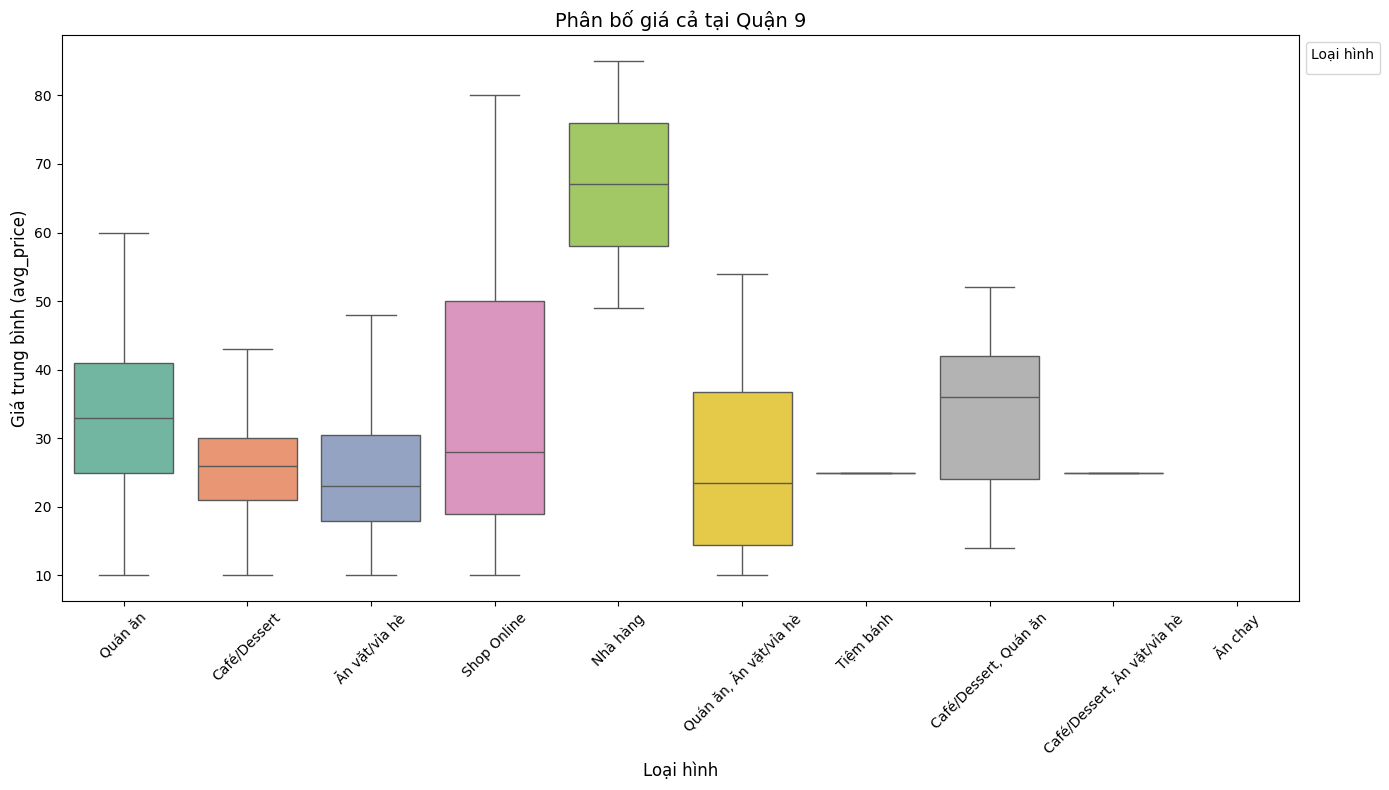

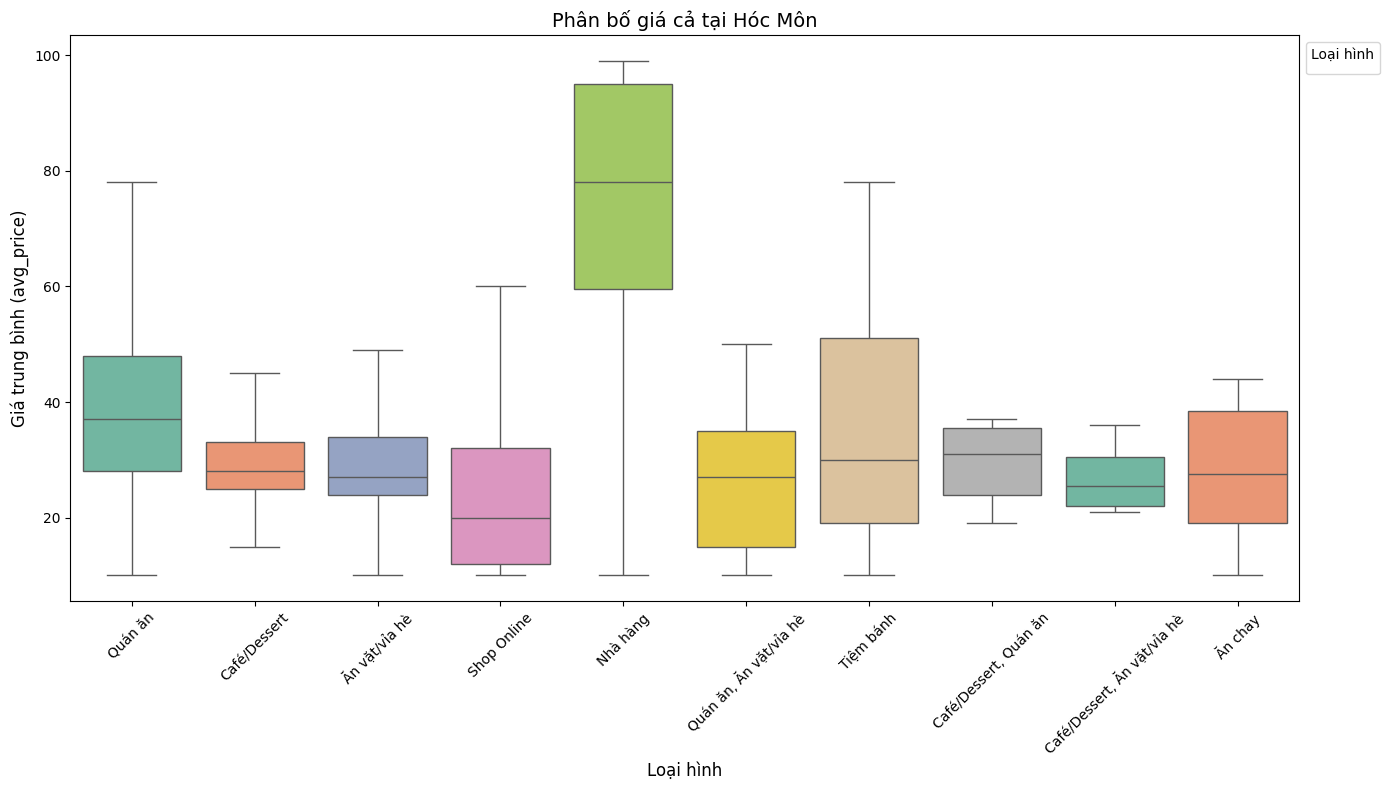

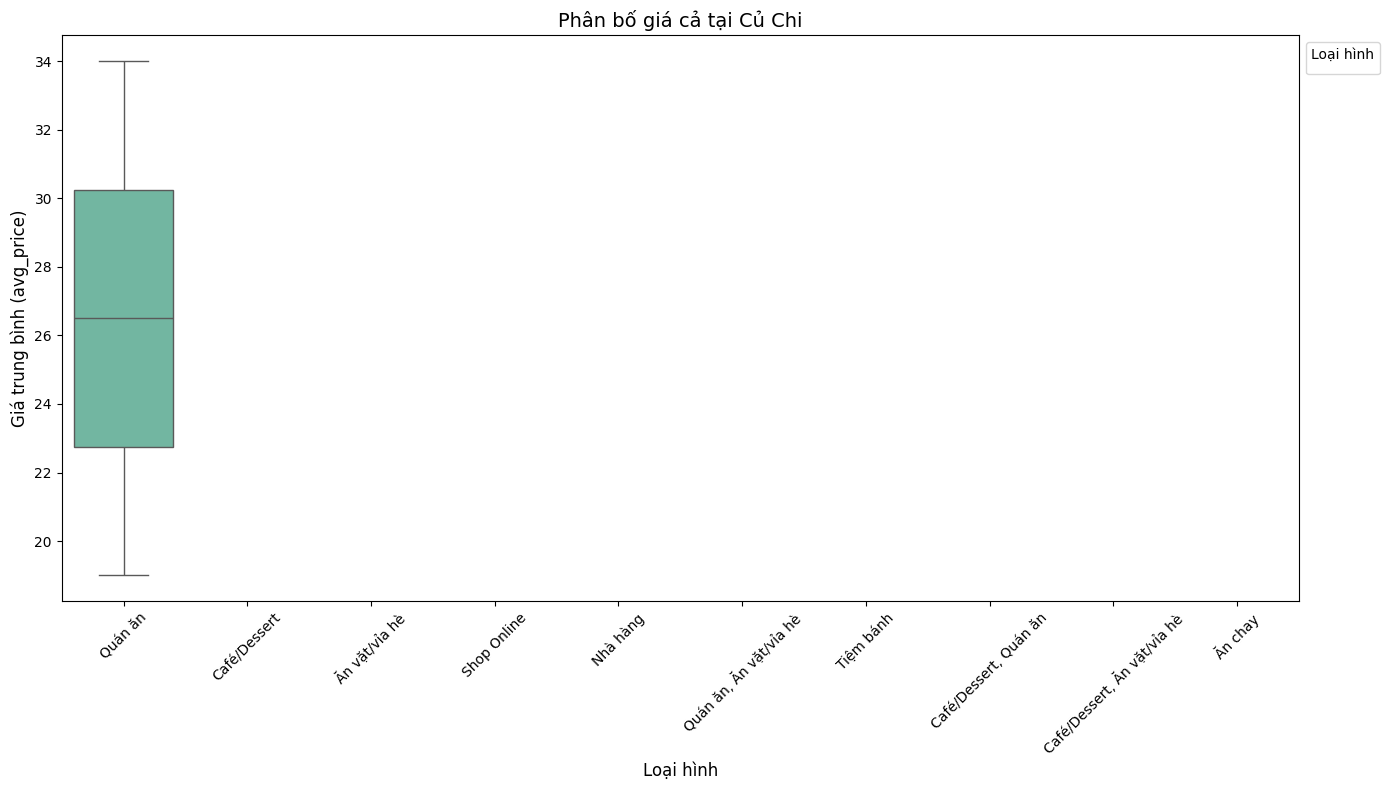

In [18]:
# Lọc dữ liệu theo top 10 loại hình phổ biến
category_district_avg_price = df[df['categories'].isin(top_categories[:10])]

# Lấy danh sách các quận duy nhất
districts = category_district_avg_price['district'].unique()

# Tạo một dictionary ánh xạ loại hình -> màu sắc cố định (dựa trên top_categories)
category_palette = {category: color for category, color in zip(top_categories[:10], sns.color_palette("Set2", n_colors=10))}

# Đặt thứ tự cố định của các loại hình kinh doanh (categories) trên trục x
category_order = top_categories[:10]

# Vẽ boxplot cho giá cả theo quận và loại hình
for district in districts:
    plt.figure(figsize=(14, 8))  # Tạo figure cho từng quận
    district_data = category_district_avg_price[category_district_avg_price['district'] == district]
    
    # Vẽ boxplot với màu sắc cố định cho mỗi loại hình và thứ tự cố định cho trục x
    sns.boxplot(data=district_data, x='categories', y='avg_price', 
                palette=category_palette, order=category_order, showfliers=False)
    
    # Cài đặt tiêu đề và nhãn
    plt.title(f'Phân bố giá cả tại {district}', fontsize=14)
    plt.xlabel('Loại hình', fontsize=12)
    plt.ylabel('Giá trung bình (avg_price)', fontsize=12)
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
    plt.legend(title="Loại hình", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()  # Đảm bảo bố cục không bị chồng lấn
    plt.show()

### 4.3 Phân bố đánh giá trung bình (`avg`) của các loại hình tại từng quận

**Mục tiêu**:
- Biểu đồ này tập trung vào phân tích đánh giá trung bình (avg) của các loại hình F&B trong từng quận. Mỗi loại hình sẽ được vẽ riêng một histogram để nhìn rõ sự phân bố của đánh giá trung bình, đồng thời có thêm đường KDE để thể hiện xu hướng chung.
- Biểu đồ giúp so sánh mức độ hài lòng của khách hàng đối với từng loại hình trong các quận khác nhau.

**Lợi ích đối với người làm kinh doanh trong lĩnh vực F&B**:
- Chất lượng dịch vụ: Nếu đánh giá trung bình của loại hình mà bạn kinh doanh ở một quận quá thấp, điều này có thể chỉ ra rằng chất lượng dịch vụ của bạn đang không được khách hàng đánh giá cao, cần có sự cải thiện.
- Phát triển sản phẩm: Sự phân bố đánh giá có thể giúp bạn nhận diện được loại hình F&B nào đang nhận được sự yêu thích và loại hình nào cần cải thiện để đáp ứng tốt hơn nhu cầu khách hàng.
- Điều chỉnh chiến lược marketing: Dựa trên mức độ đánh giá của khách hàng, bạn có thể điều chỉnh chiến lược marketing, như nâng cao trải nghiệm khách hàng để cải thiện điểm đánh giá.

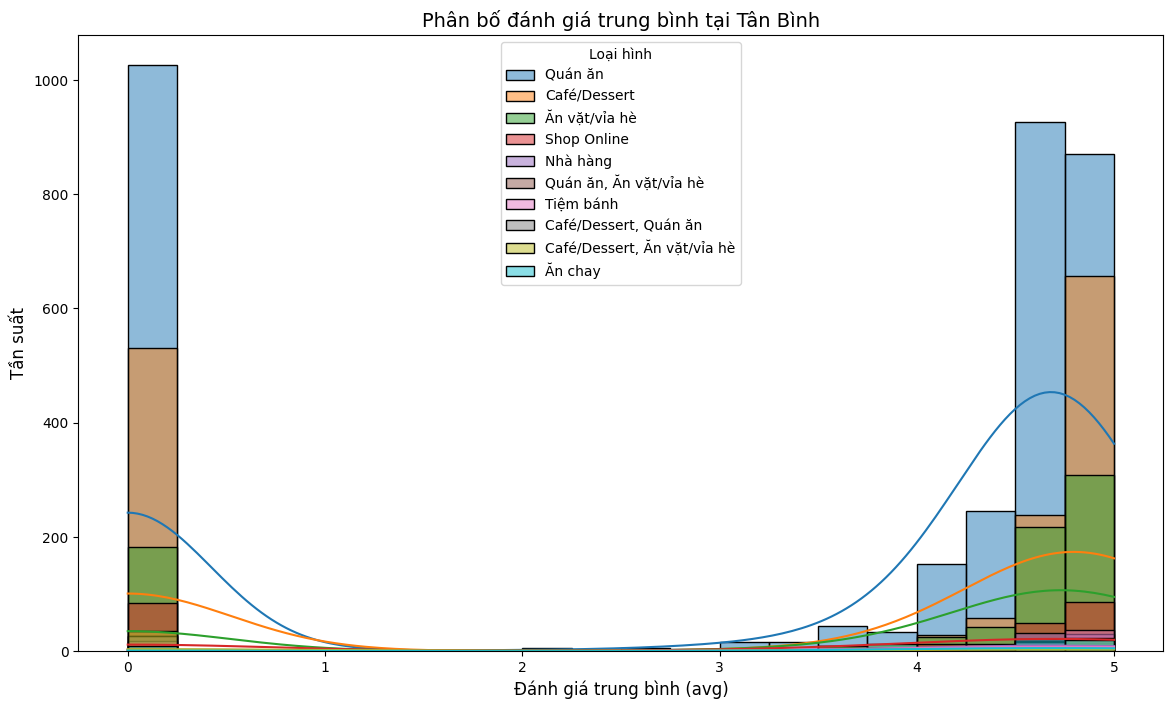

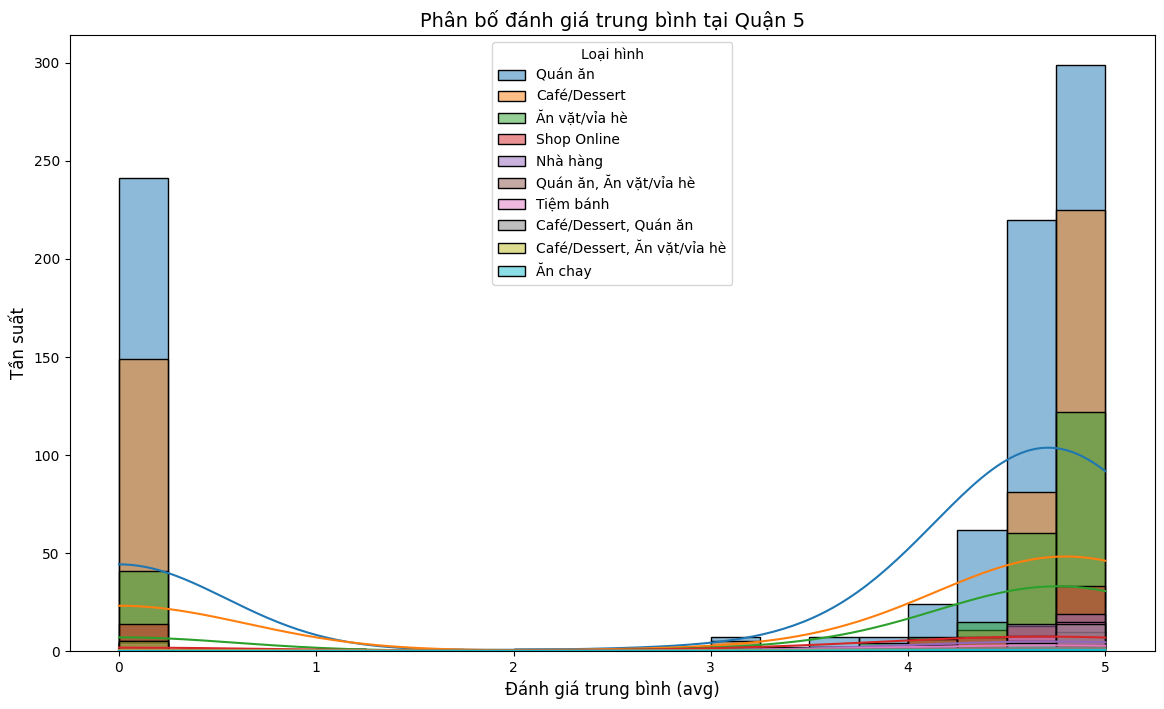

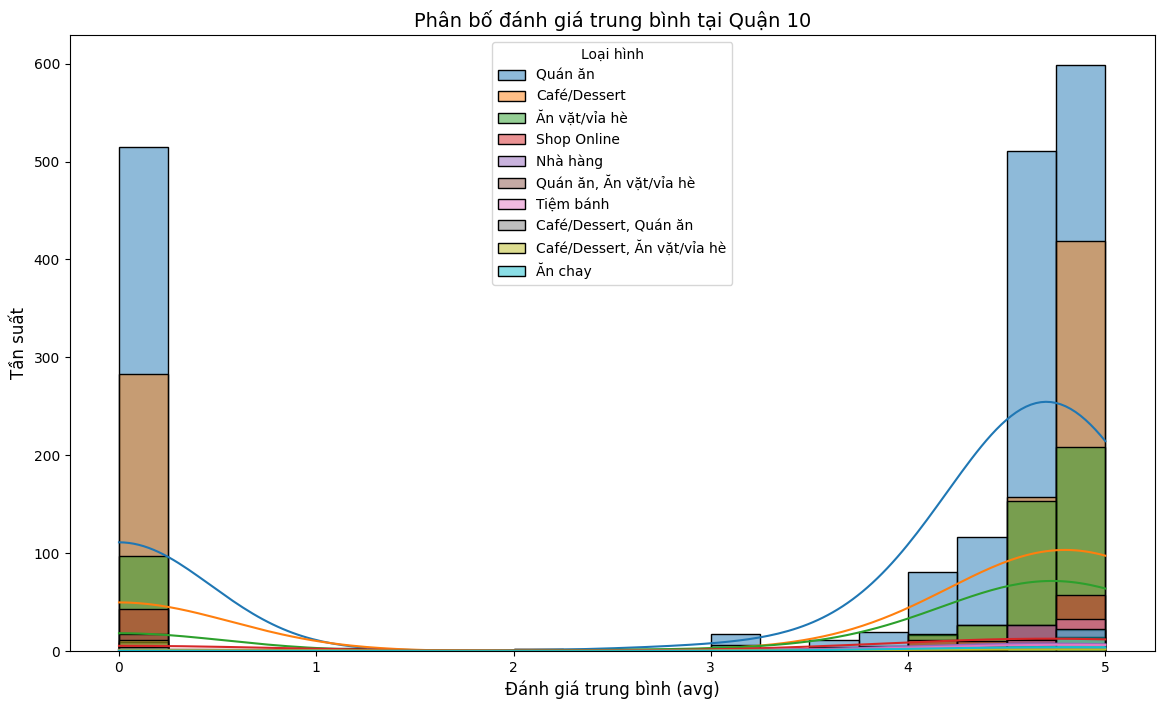

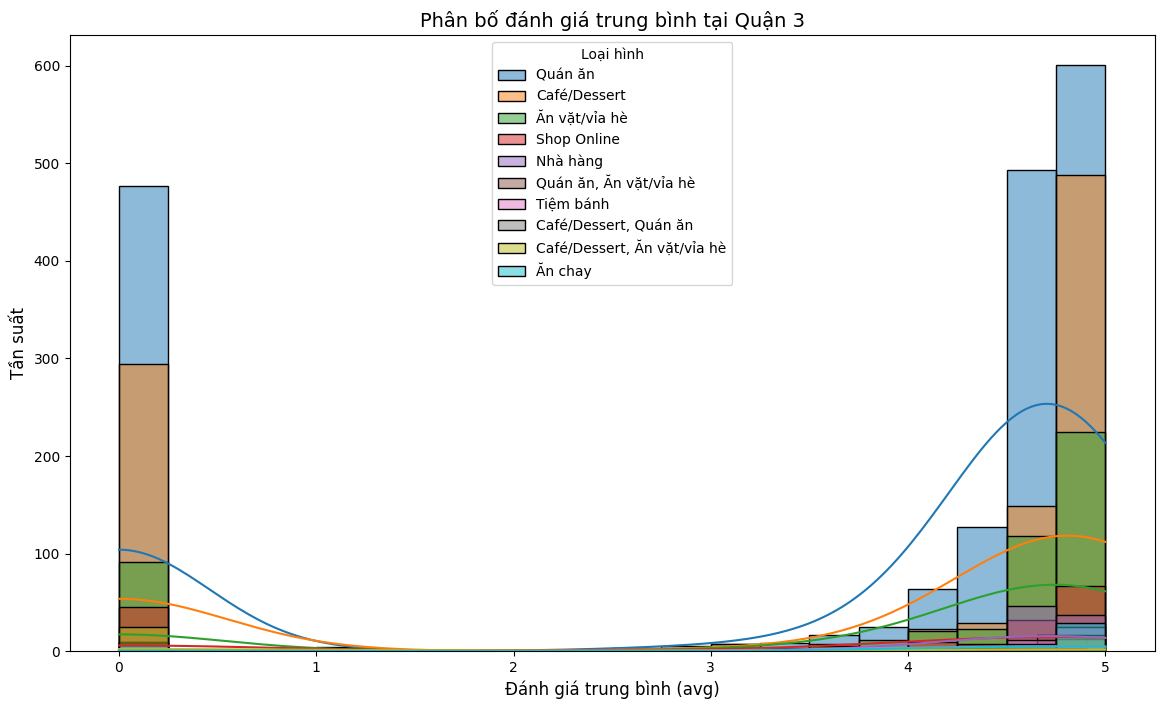

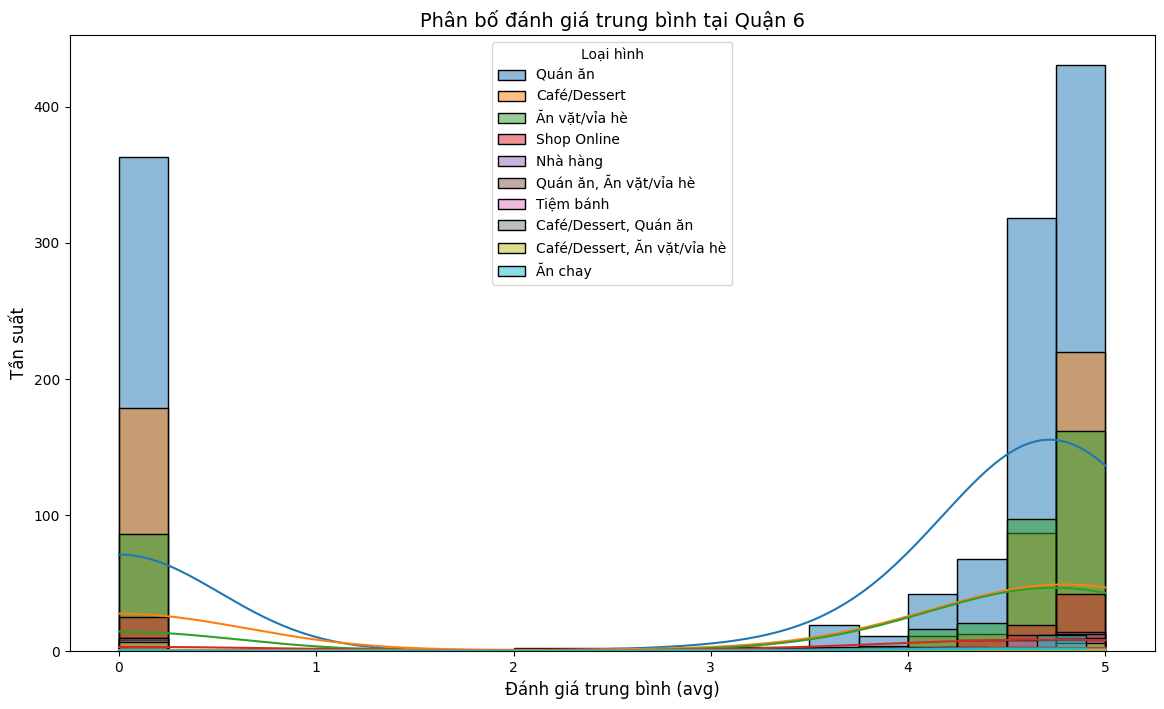

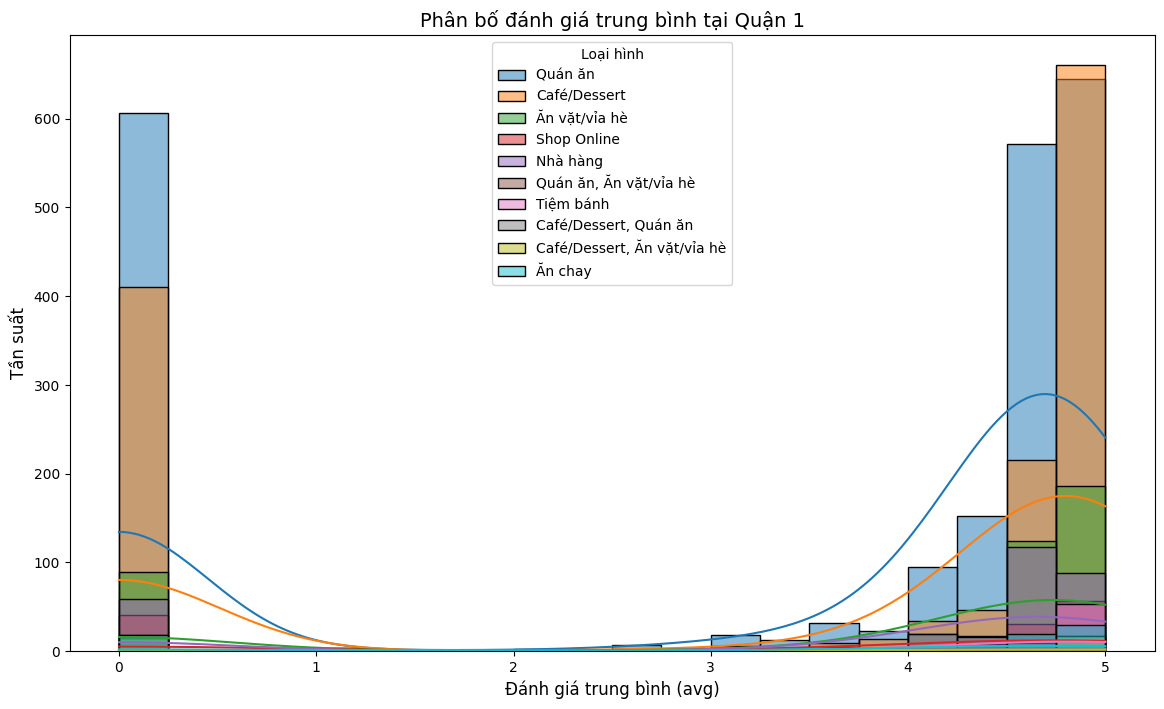

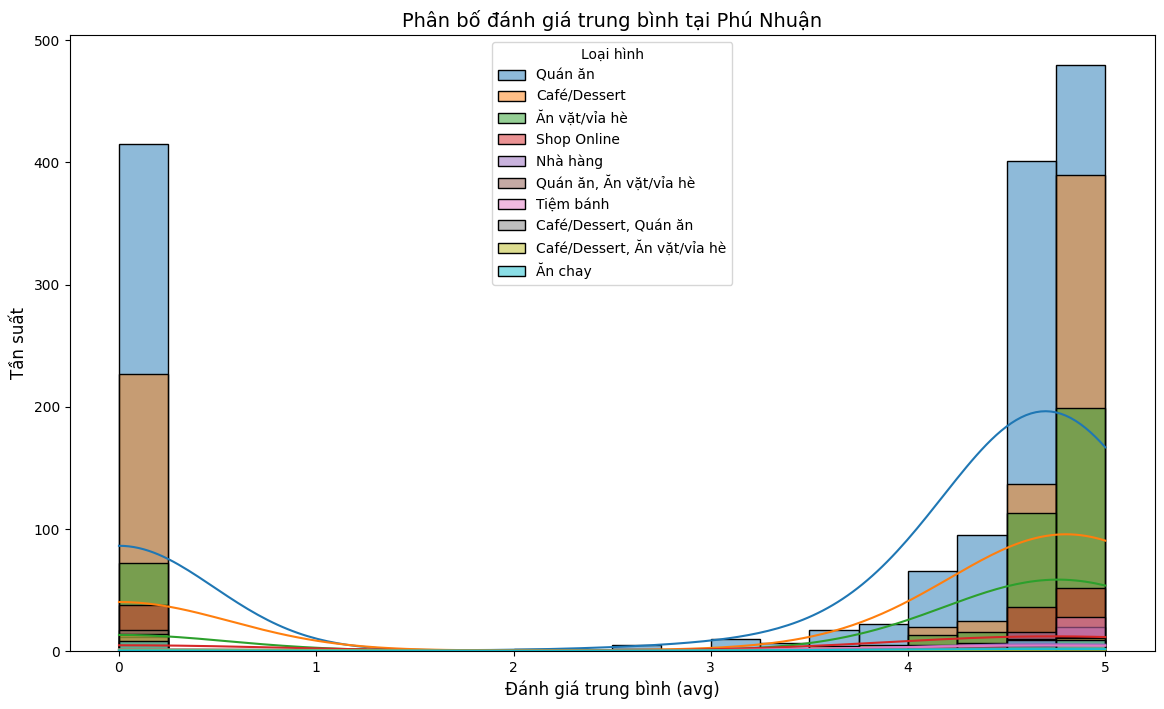

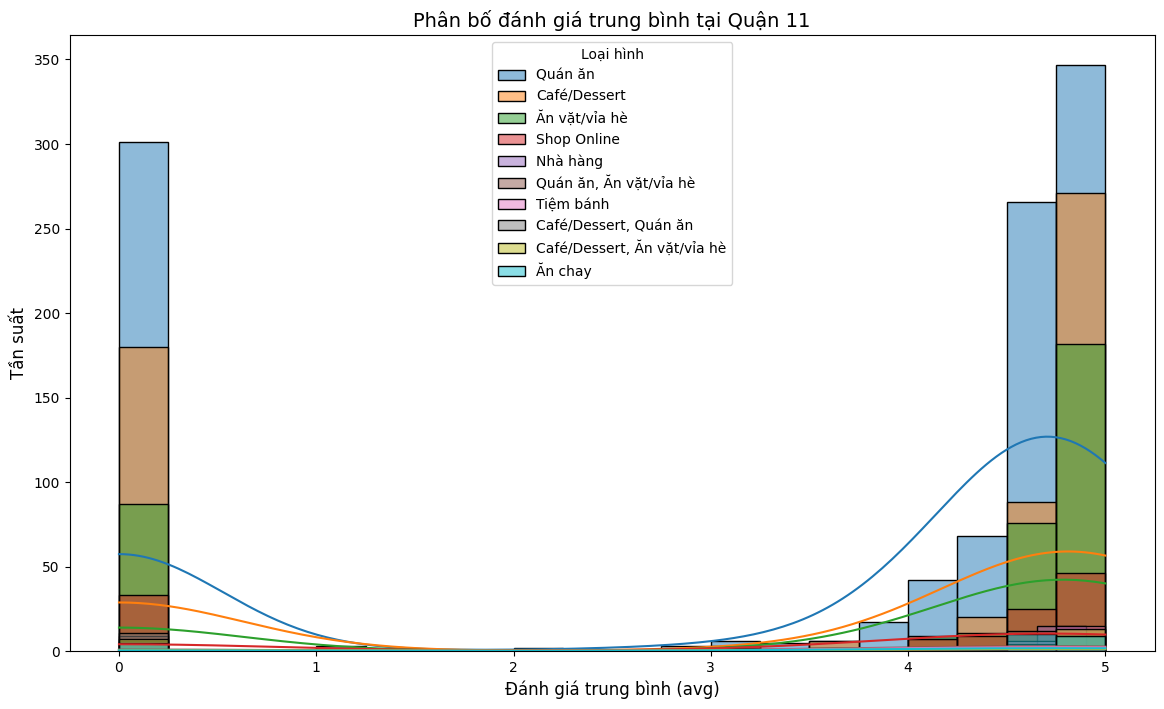

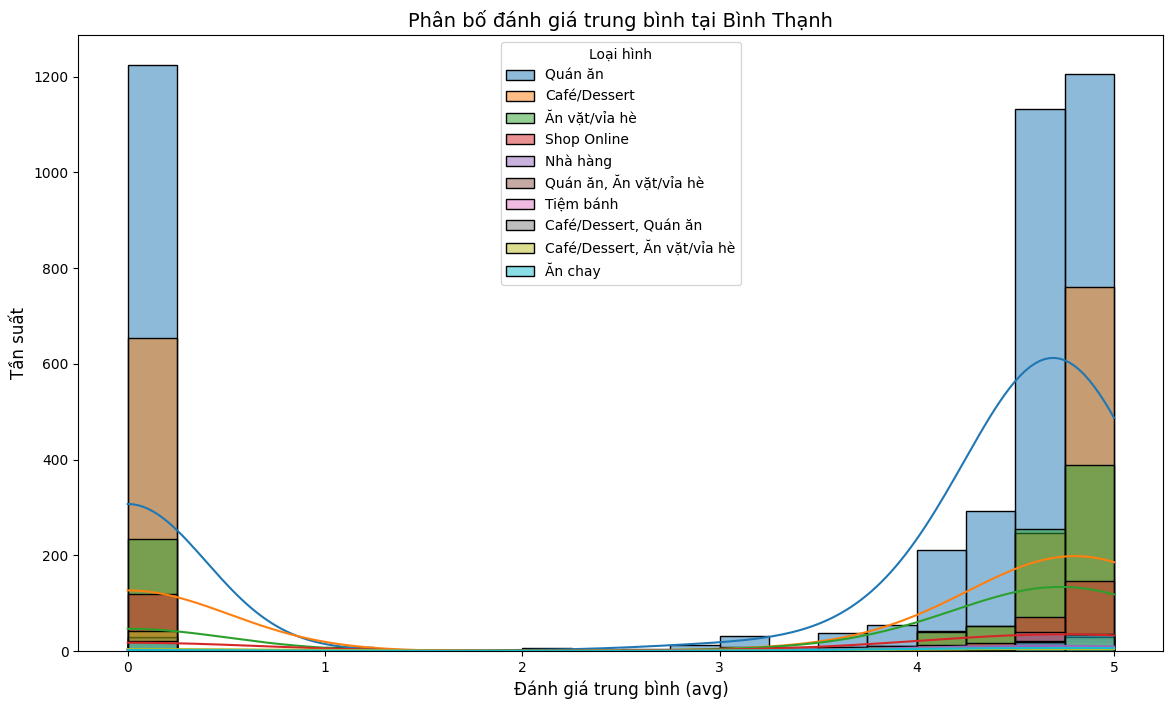

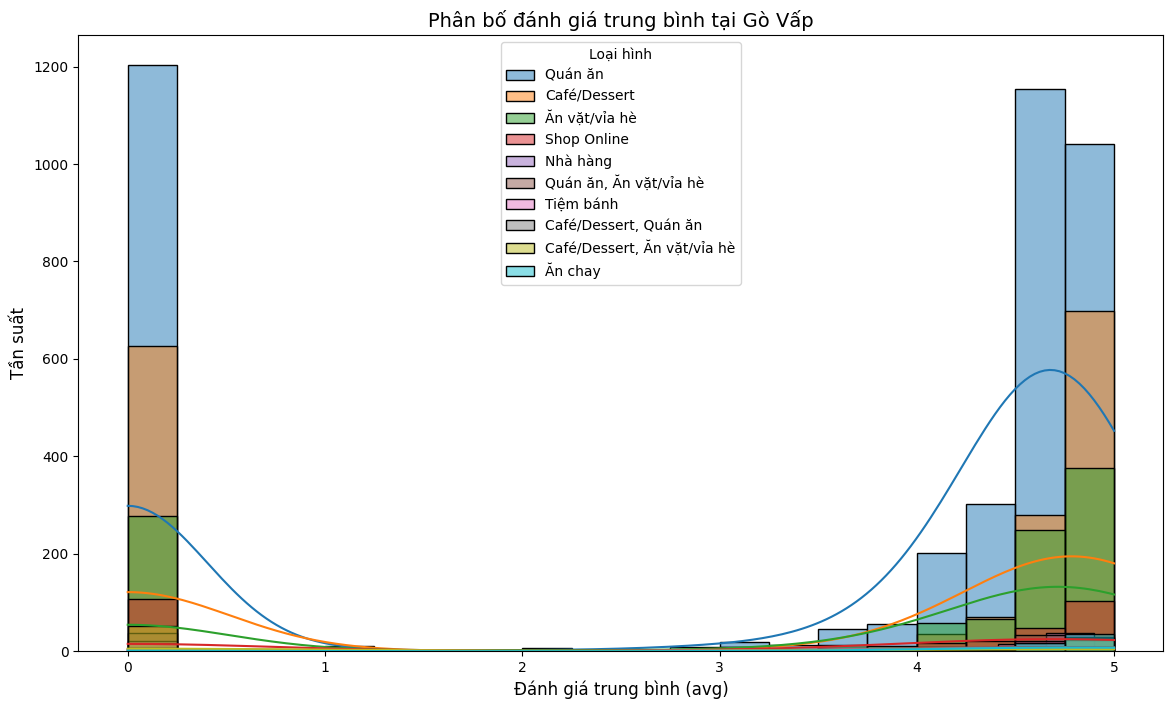

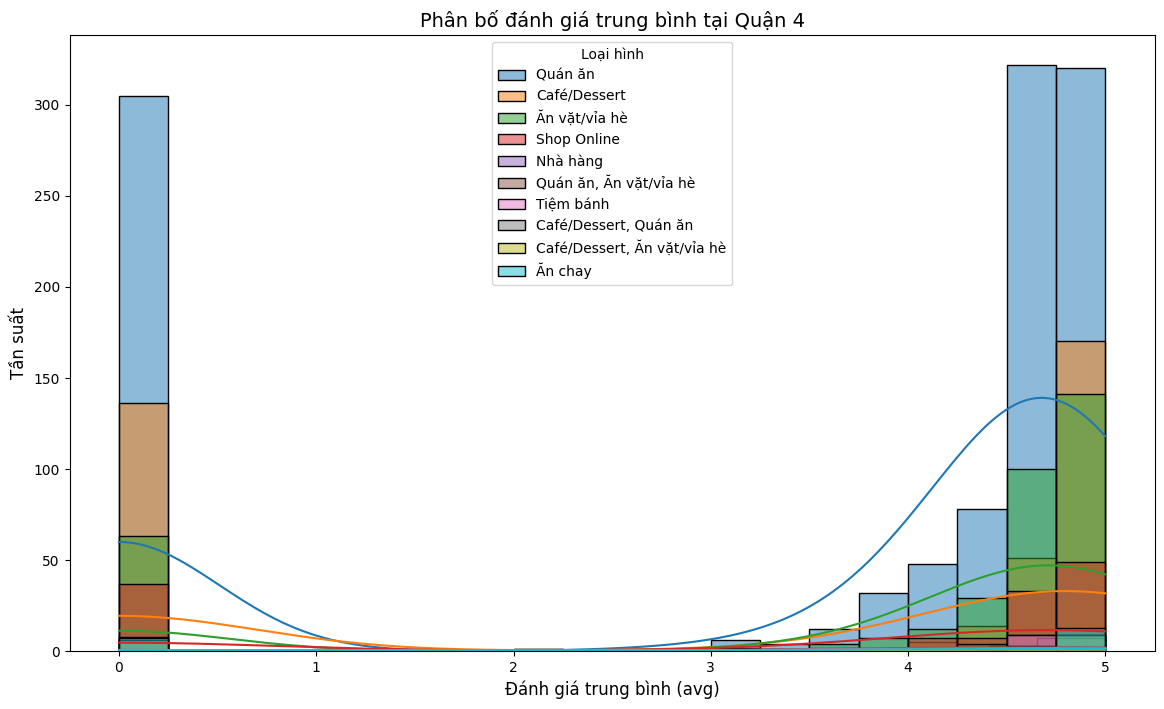

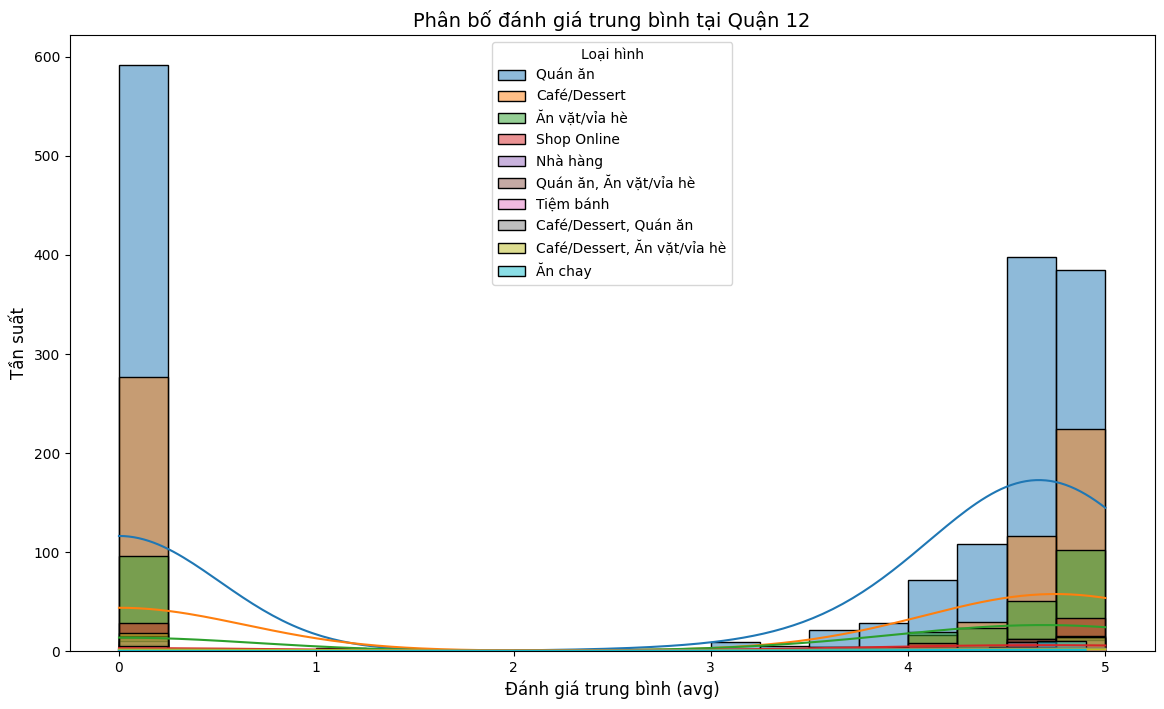

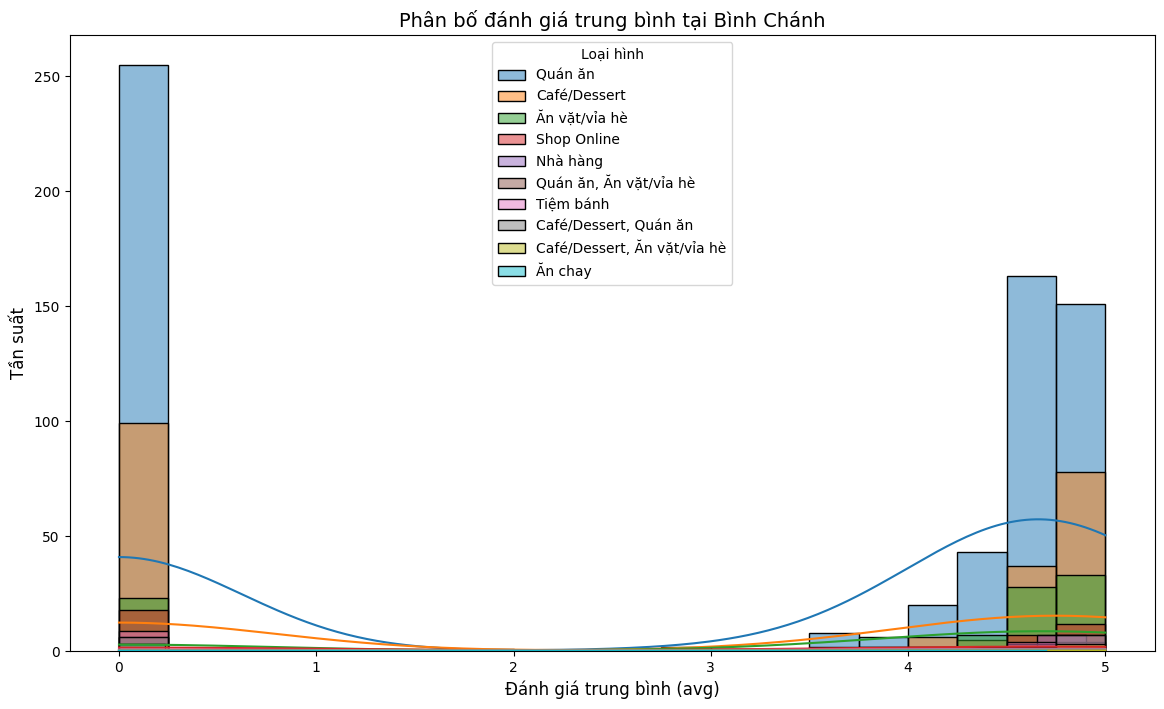

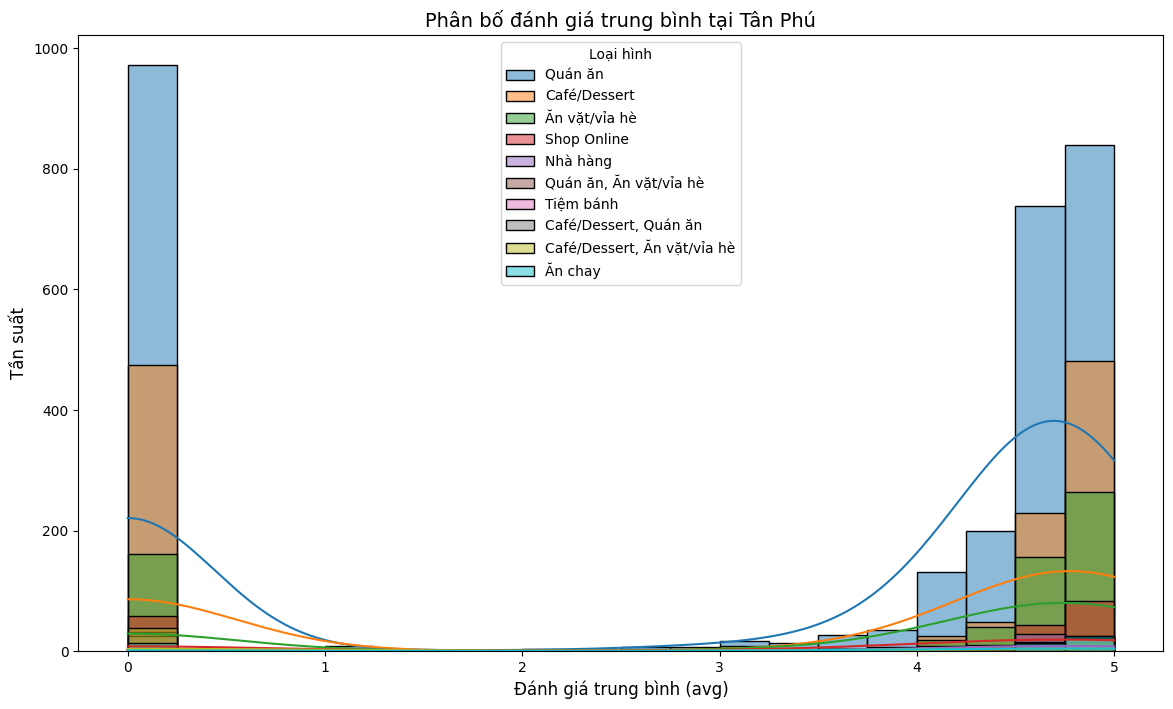

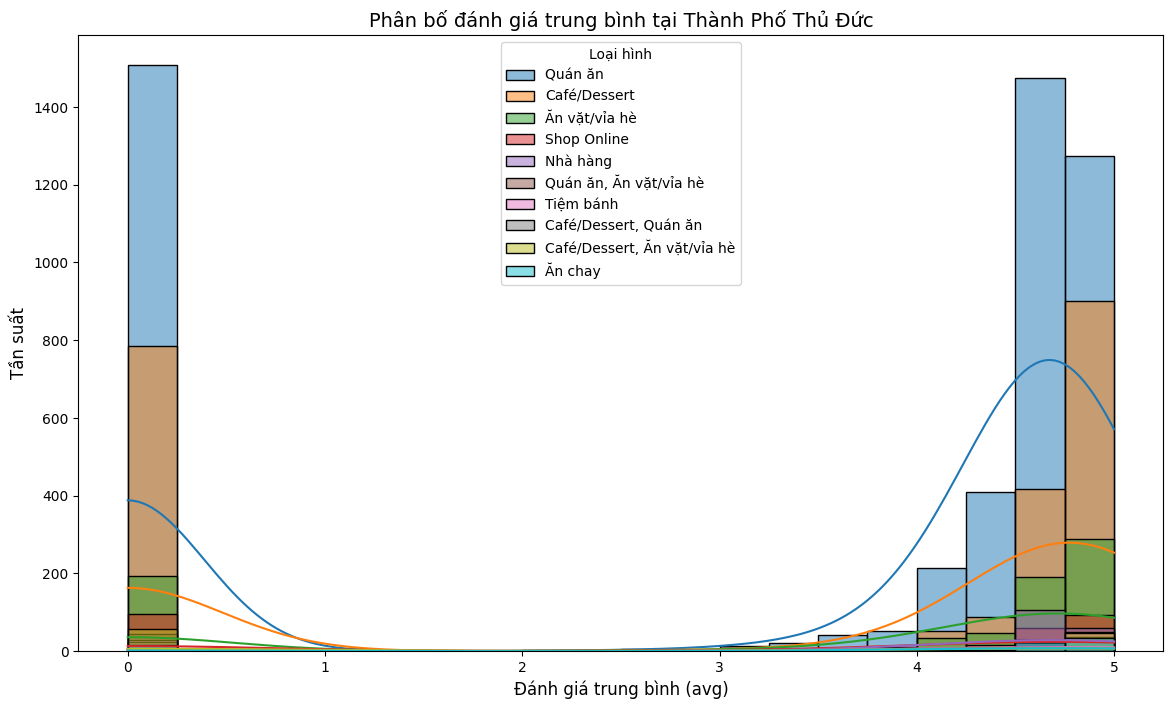

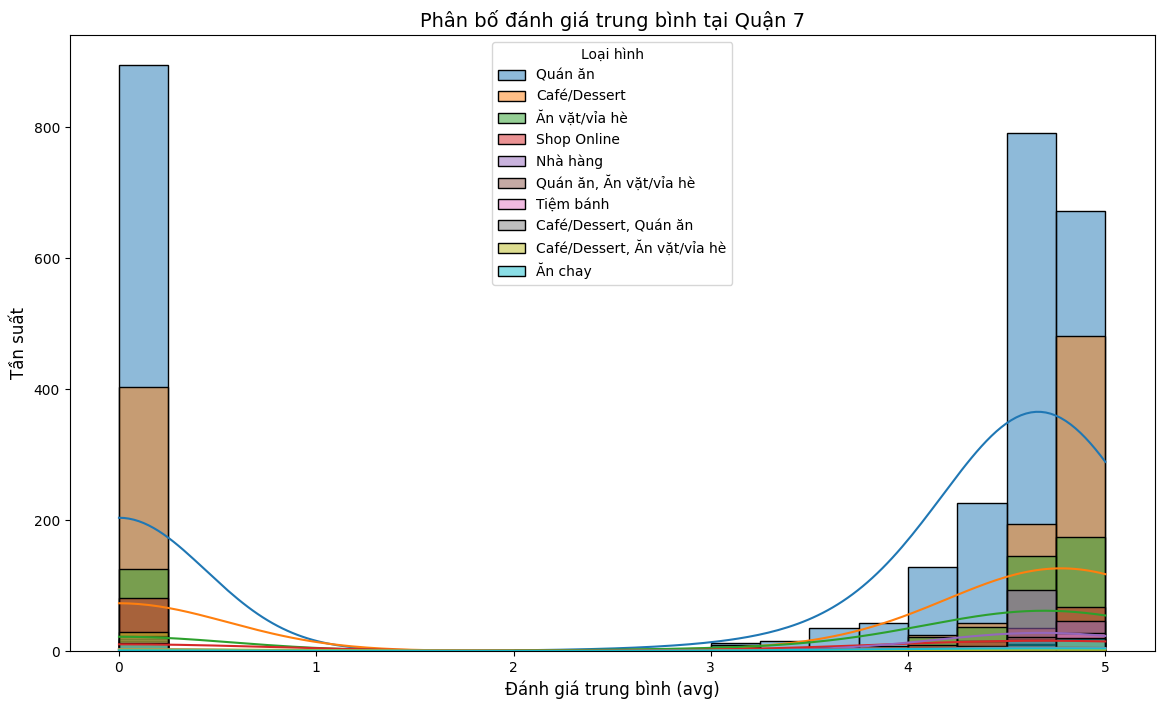

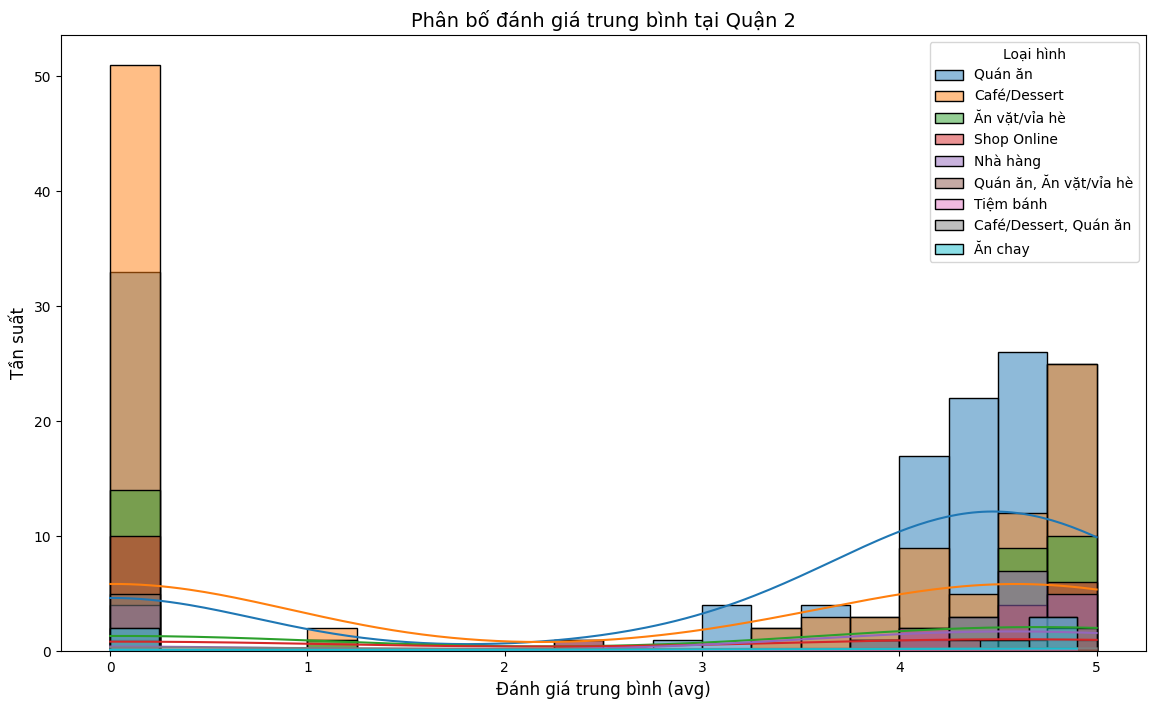

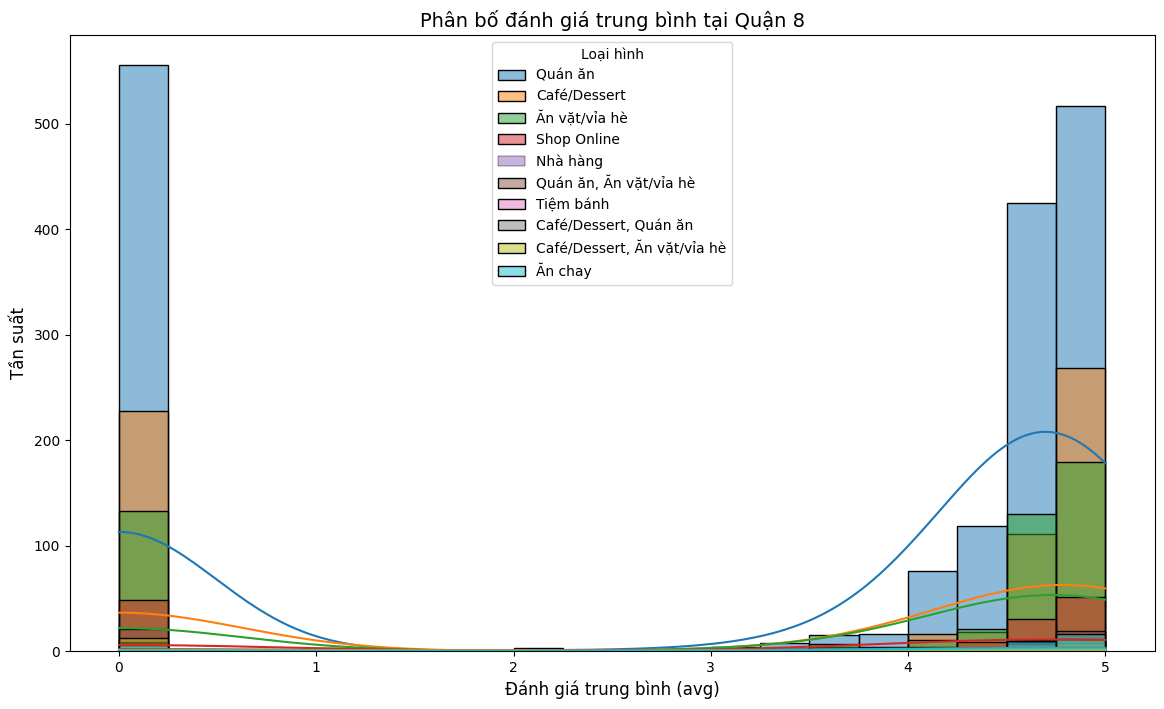

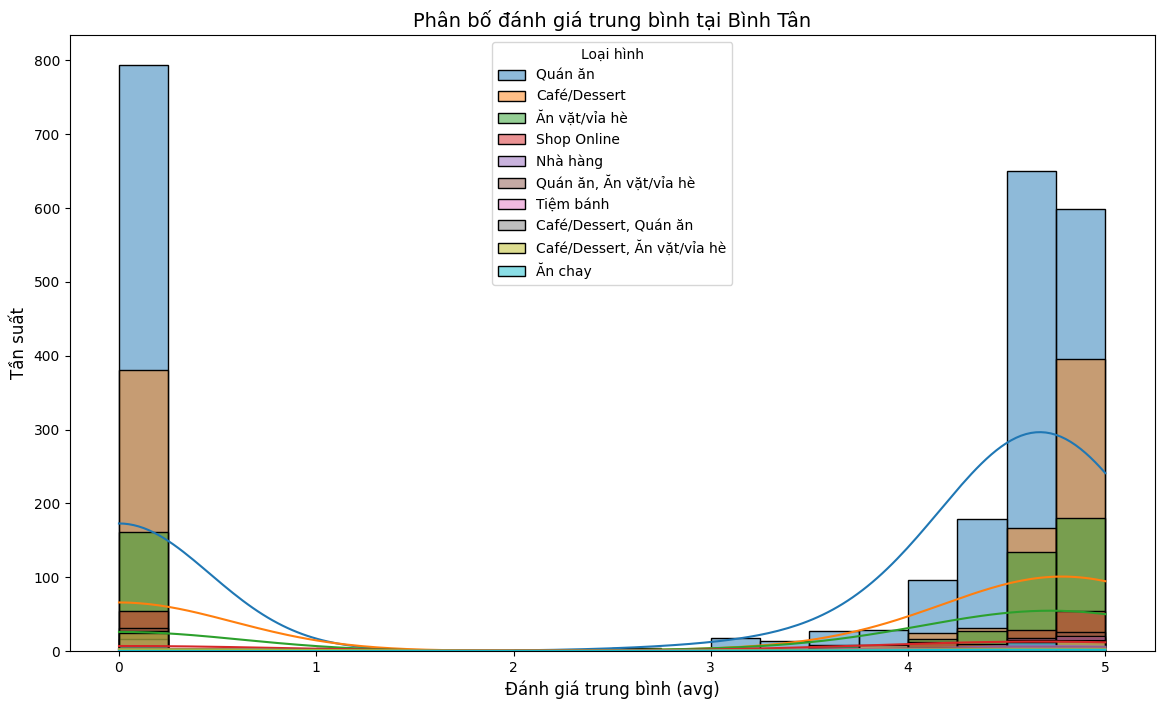

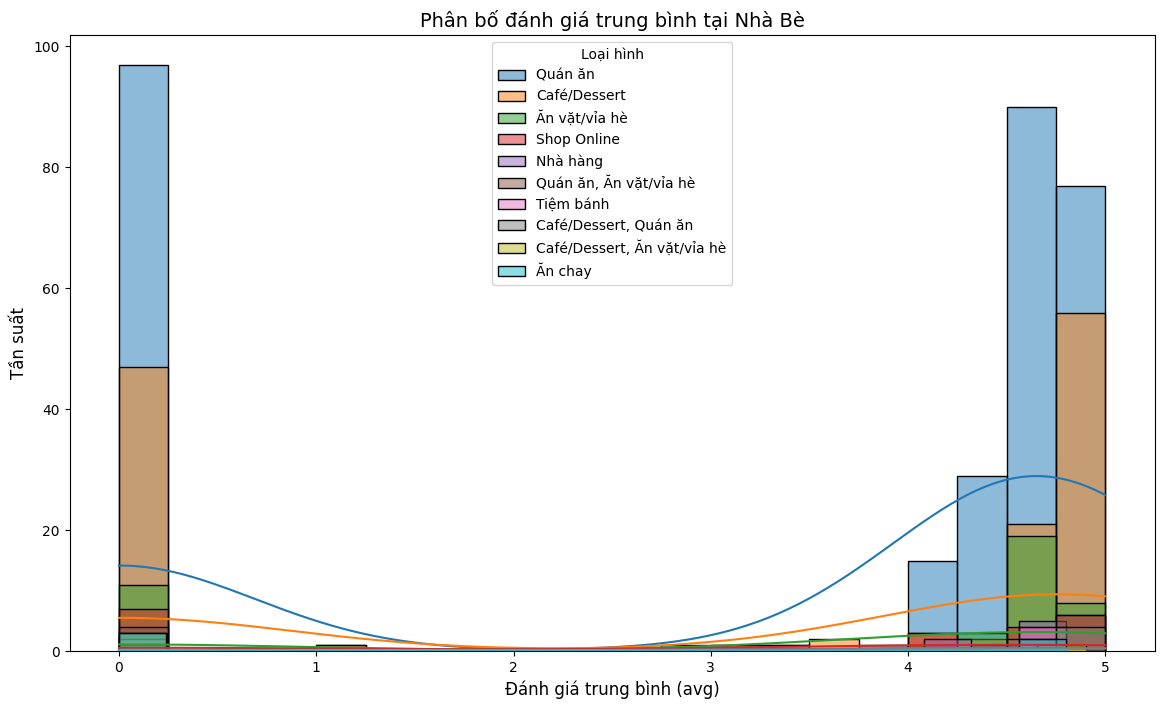

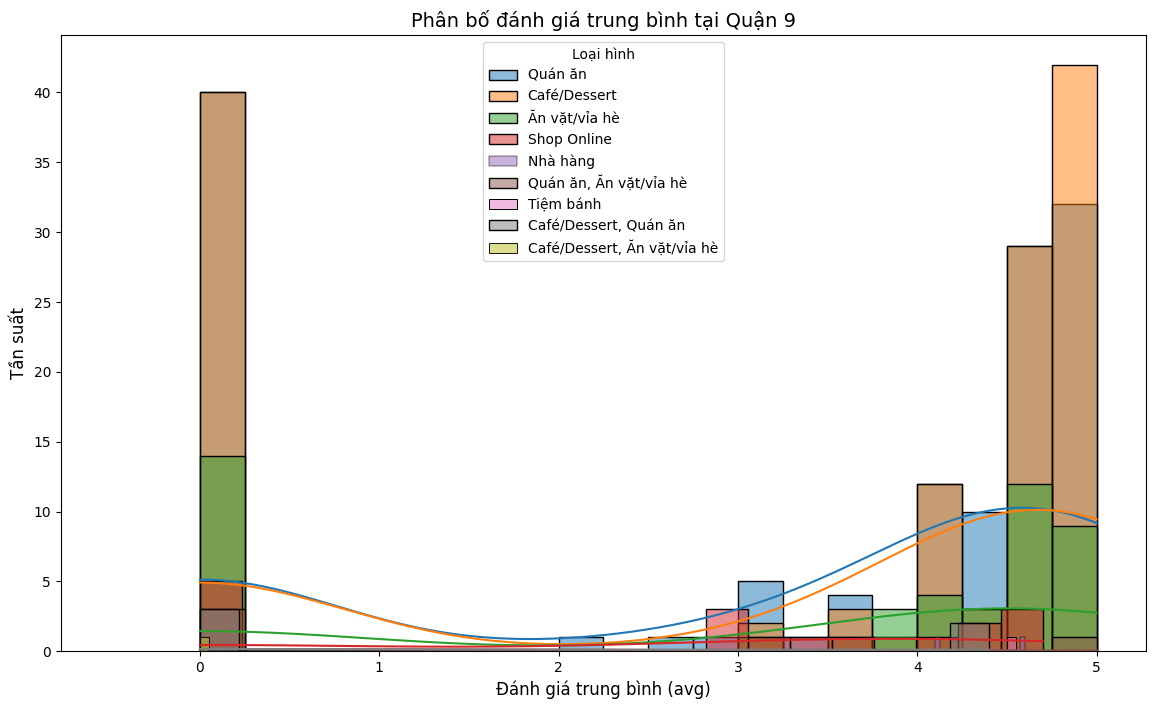

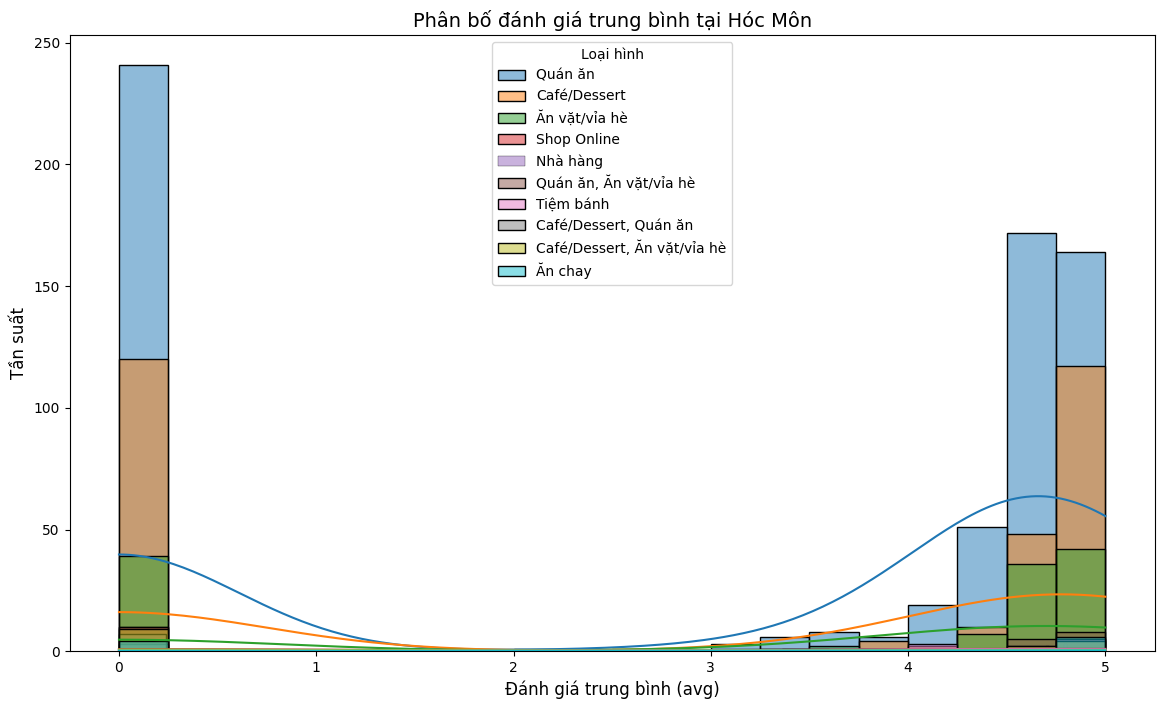

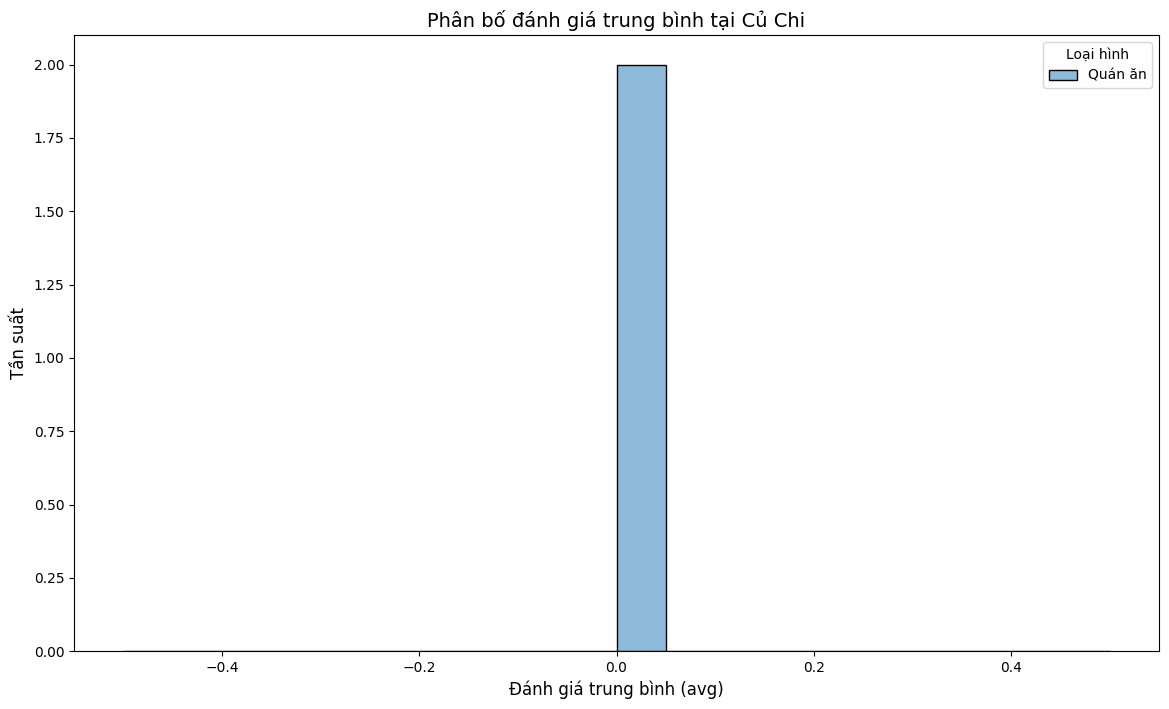

In [19]:
# Lọc dữ liệu theo top 10 loại hình phổ biến
category_district_avg = df[df['categories'].isin(top_categories)]

# Lấy danh sách các quận duy nhất
districts = category_district_avg['district'].unique()

# Vẽ histogram cho đánh giá trung bình (avg) theo quận và loại hình
for district in districts:
    plt.figure(figsize=(14, 8))
    district_data = category_district_avg[category_district_avg['district'] == district]
    
    # Lặp qua từng loại hình và vẽ histogram riêng cho từng loại hình
    for category in top_categories:
        category_data = district_data[district_data['categories'] == category]
        
        # Vẽ histogram với line_kws để thay đổi màu sắc của đường KDE
        sns.histplot(category_data['avg'], kde=True, label=category, bins=20, 
                     line_kws={'color': 'black'})
    
    plt.title(f'Phân bố đánh giá trung bình tại {district}', fontsize=14)
    plt.xlabel('Đánh giá trung bình (avg)', fontsize=12)
    plt.ylabel('Tần suất', fontsize=12)
    plt.legend(title="Loại hình")
    plt.show()

Phân tích Mẫu Biểu đồ: Phân bố đánh giá trung bình tại quận Tân Bình
1. Mô tả Biểu đồ:
    - Biểu đồ này là một histogram với đường KDE (Kernel Density Estimation) cho thấy sự phân bố đánh giá trung bình của các loại hình kinh doanh trong lĩnh vực F&B tại quận Tân Bình. Các loại hình kinh doanh được thể hiện dưới dạng các thanh (bar) trong histogram, và đường cong KDE giúp làm rõ xu hướng phân bố đánh giá trung bình cho mỗi loại hình.

2. Các Đặc Điểm Cần Chú Ý:
    - Các loại hình kinh doanh phổ biến như "Quán ăn" (blue), "Café/Dessert" (green), và "Ăn vặt/via hè" (orange) chiếm tỉ lệ lớn trong phân bố. Các loại hình này có tần suất đánh giá cao (với số lượng lớn các thanh trong khoảng đánh giá 4-5), cho thấy người tiêu dùng tại khu vực Tân Bình có xu hướng đánh giá cao các nhà hàng này.
    - Các loại hình ít phổ biến hơn như "Shop Online", "Nhà hàng" hoặc "Tiệm bánh" có tần suất đánh giá thấp hơn và nằm chủ yếu trong khoảng từ 0 đến 2 điểm. Điều này có thể chỉ ra rằng những loại hình này có ít khách hàng hoặc ít được quan tâm trong khu vực Tân Bình.

3. Phân tích chi tiết:
- Quán ăn (blue):
    - Tần suất cao ở mức đánh giá từ 4-5 cho thấy quán ăn tại Tân Bình có một lượng lớn khách hàng hài lòng với chất lượng và dịch vụ. Điều này chứng tỏ rằng quán ăn tại khu vực này đang làm tốt trong việc duy trì sự hài lòng của khách hàng.
    - Các đánh giá thấp (dưới 2) rất ít, cho thấy ít có phản hồi tiêu cực từ khách hàng về quán ăn.

- Café/Dessert (green):
    - Tương tự như "Quán ăn", phân bố của loại hình này chủ yếu nằm ở mức đánh giá 4-5, thể hiện sự yêu thích mạnh mẽ của khách hàng đối với các quán café và dessert tại Tân Bình.
    - Tuy nhiên, đường KDE cho thấy sự phân bố của đánh giá không đồng đều, với một lượng nhỏ đánh giá thấp (0-1), có thể là những quán mới mở hoặc chưa đạt được sự yêu thích ổn định.

- Ăn vặt/via hè (orange):
    - Mặc dù phần lớn đánh giá cũng nằm ở mức cao, nhưng "Ăn vặt/via hè" lại có sự phân bố đa dạng hơn, với nhiều phản hồi nằm ở mức trung bình (2-3). Điều này có thể cho thấy một sự pha trộn về chất lượng và dịch vụ trong loại hình này, có thể do sự cạnh tranh khốc liệt hoặc sự đa dạng trong dịch vụ.

- Nhà hàng (brown):
    - "Nhà hàng" có phần ít đánh giá tích cực hơn so với các loại hình khác, với tần suất tập trung chủ yếu ở mức 2-3. Điều này có thể phản ánh rằng một số nhà hàng tại Tân Bình chưa hoàn toàn đáp ứng được sự kỳ vọng của khách hàng. Cũng có thể do những yếu tố khác như giá cả hoặc không gian không phù hợp với thị hiếu của người dân trong khu vực.

- Các loại hình ít phổ biến:
    - "Tiệm bánh", "Shop Online", và các loại hình khác như "Café/Dessert, Quán ăn" cho thấy mức độ đánh giá thấp hơn và một phân bố ít hơn ở mức 4-5. Đây là các loại hình chưa được phổ biến rộng rãi hoặc có số lượng ít tại khu vực này.

4. Đề xuất cho người làm kinh doanh F&B:
- Tăng cường chất lượng dịch vụ và sản phẩm: Các loại hình như quán ăn và café/dessert đã có sự thành công lớn trong việc duy trì sự hài lòng của khách hàng, nhưng vẫn có thể cải thiện hơn nữa để duy trì vị trí trong tâm trí khách hàng. Các loại hình như "Nhà hàng" có thể cải thiện dịch vụ hoặc menu của mình để đáp ứng nhu cầu của thị trường.
- Nâng cao trải nghiệm khách hàng: Với những loại hình có đánh giá thấp, đặc biệt là trong phân khúc "Nhà hàng", có thể cần cải thiện không gian, dịch vụ, hay thậm chí cả giá cả để tăng mức độ hài lòng của khách hàng.
- Tăng cường chiến lược marketing cho các loại hình ít phổ biến: Những loại hình ít phổ biến như "Tiệm bánh" hay "Shop Online" có thể cần một chiến lược marketing đặc biệt để nâng cao sự nhận diện thương hiệu và thu hút khách hàng hơn, đặc biệt là khi phân bố đánh giá của chúng còn khá thấp.